# Learning Goals

* You will be able to visualize data with basic plots using Matplotlib and Seaborn.
    * 1D distributions
    * 2D relational data
    * 3D relational data
    * Categorical data
* You will appreciate that how you choose to show data can have a large impact on how it is interpreted.

### I do NOT expect you to memorize all of these methods. I expect that you will gain a sense of what you can do with Matplotlib and Seaborn, and that you will be able to look up the the proper functions for how you want to show your data. You can treat this lesson as a reference to look back on.

# Load some EEG data

In [1]:
from scipy.io import loadmat  # I'm using loadmat from the io submodule of the scipy module
data = loadmat('eeg.mat')  # load data saved in MATLAB format

type(data)

dict

In [2]:
# !!! It is NOT IMPORTANT that you understand the structure of the data variable.
# !!! It IS IMPORTANT that you understand the structure of the eegs and time variables.

# Grab relevant data into a 3D array:
# - rows: channels (electrodes)
# - cols: time points (i.e. each row is an EEG recording)
# - depth: trials
eegs = data["EEG"][0,0]["data"]  # [channel, time, trial]
time = data["EEG"][0,0]["times"][0]

eegs.shape, time.shape

((64, 640, 99), (640,))

# Basic plot with Matplotlib

https://matplotlib.org/

In [3]:
# get pyplot from within the matplotlib module
import matplotlib.pyplot as plt

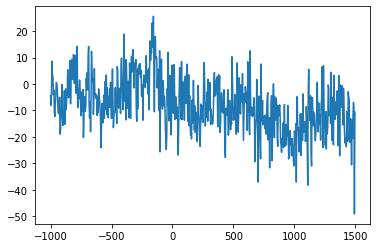

In [4]:
# Plot the EEG for the 1st trial in the 3rd channel.
plt.plot(time, eegs[2,:,0]);  # ; supresses text output !!!

## <font color=red>Exercise</font>

Plot the EEG for channel index 15, trial index 40.

# Axes labels

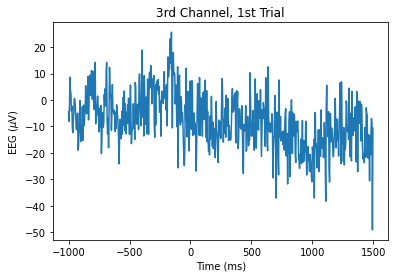

In [5]:
# Plot the EEG for the 1st trial in the 3rd channel.
plt.plot(time, eegs[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");  # ; supresses text output !!!

# Figure size

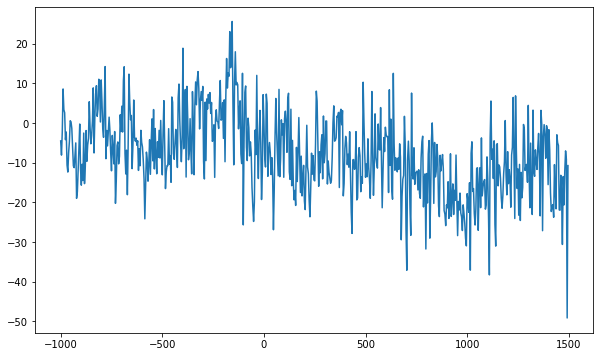

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(time, eegs[2,:,0]);

# Global settings

In [7]:
# There are many other parameters you can set like this...
plt.rcParams['figure.figsize'] = [10, 6]

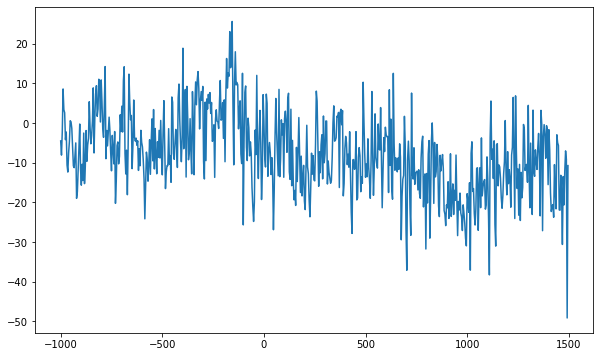

In [8]:
plt.plot(time, eegs[2,:,0]);

# Better Resolution for Retina Screens

In [9]:
# Typically you would put this at the start of your notebook.
%config InlineBackend.figure_format = 'retina'

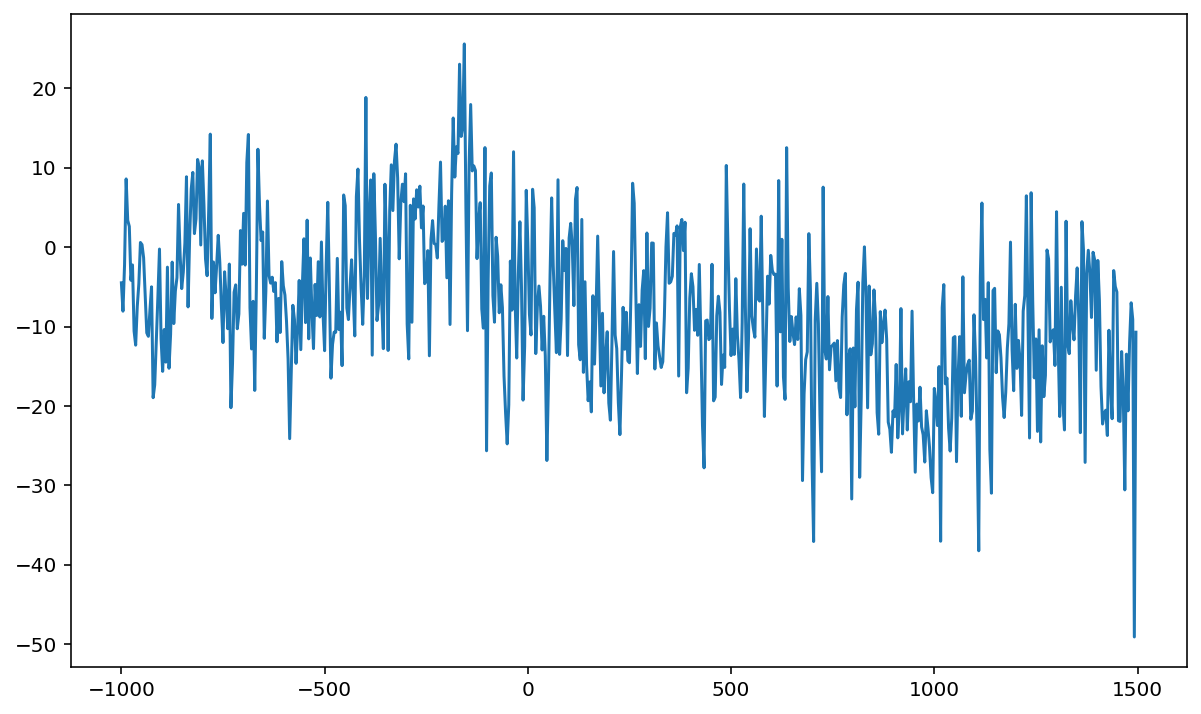

In [10]:
plt.plot(time, eegs[2,:,0]);

# Plot options

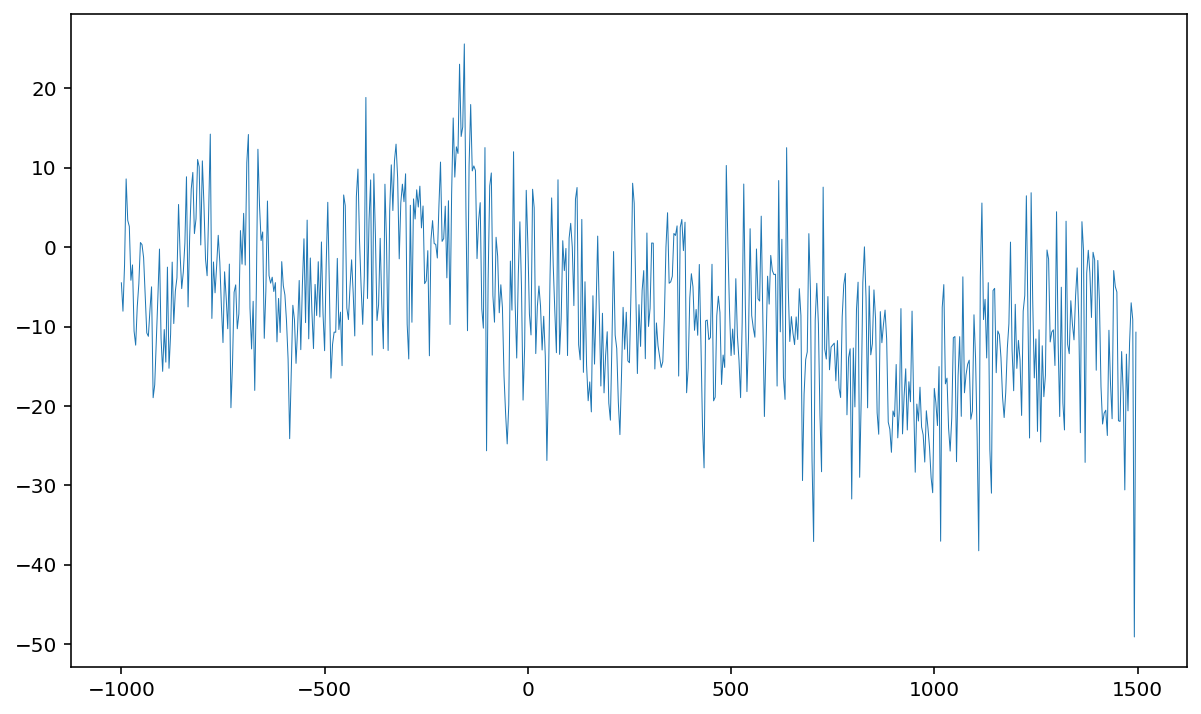

In [11]:
plt.plot(time, eegs[2,:,0], linewidth=0.5);

# Plot options

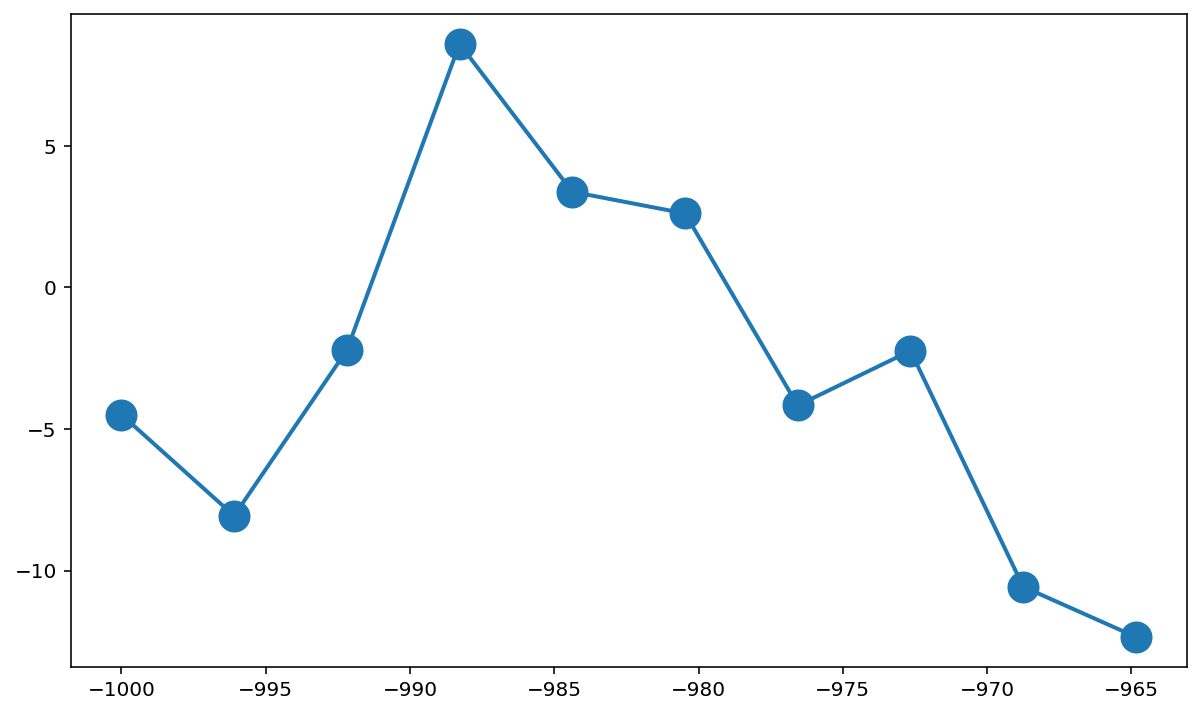

In [12]:
plt.plot(time[:10], eegs[2,:10,0], 'o-', lw=2, markersize=15);

## <font color=red>Examples</font>

* Change to a dashed line
* Change to square markers
* Show markers only (no line)

# Plot options

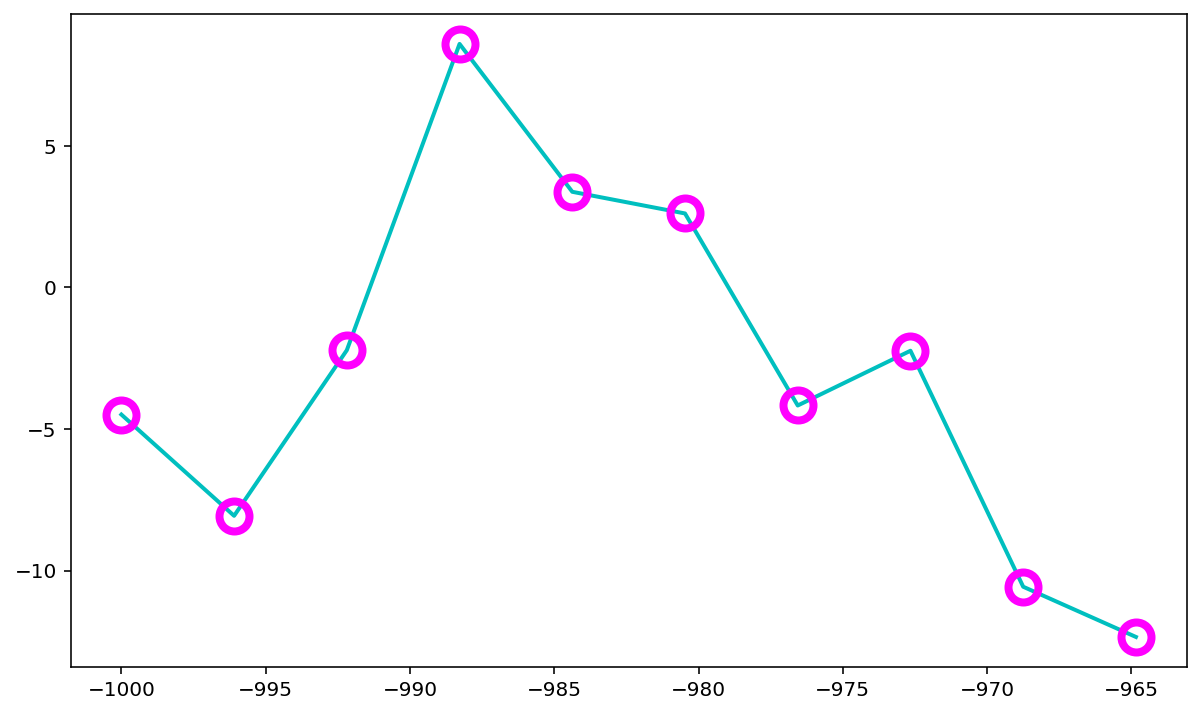

In [13]:
plt.plot(time[:10], eegs[2,:10,0], 'o-', lw=2, color='c',
         ms=15, markeredgewidth=4, markeredgecolor=(1,0,1),
         markerfacecolor='none');

# Axes limits

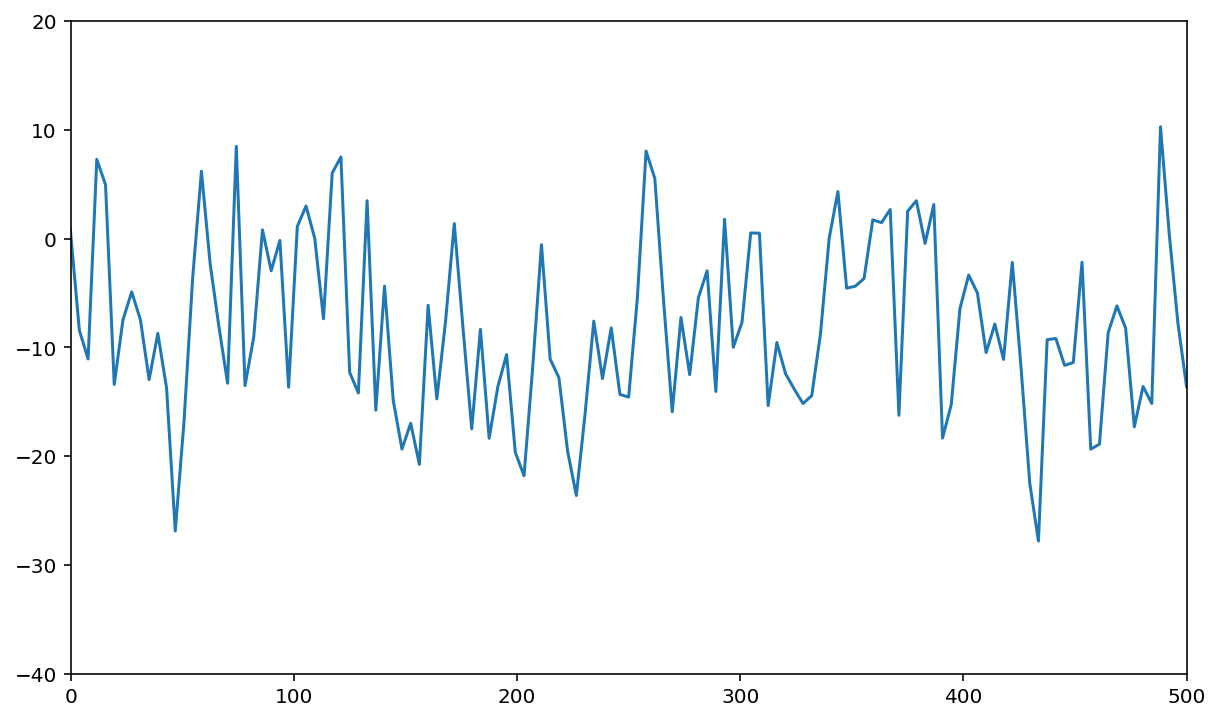

In [14]:
plt.plot(time, eegs[2,:,0])
plt.xlim([0, 500])
plt.ylim([-40, 20]);

# Overlaid plots

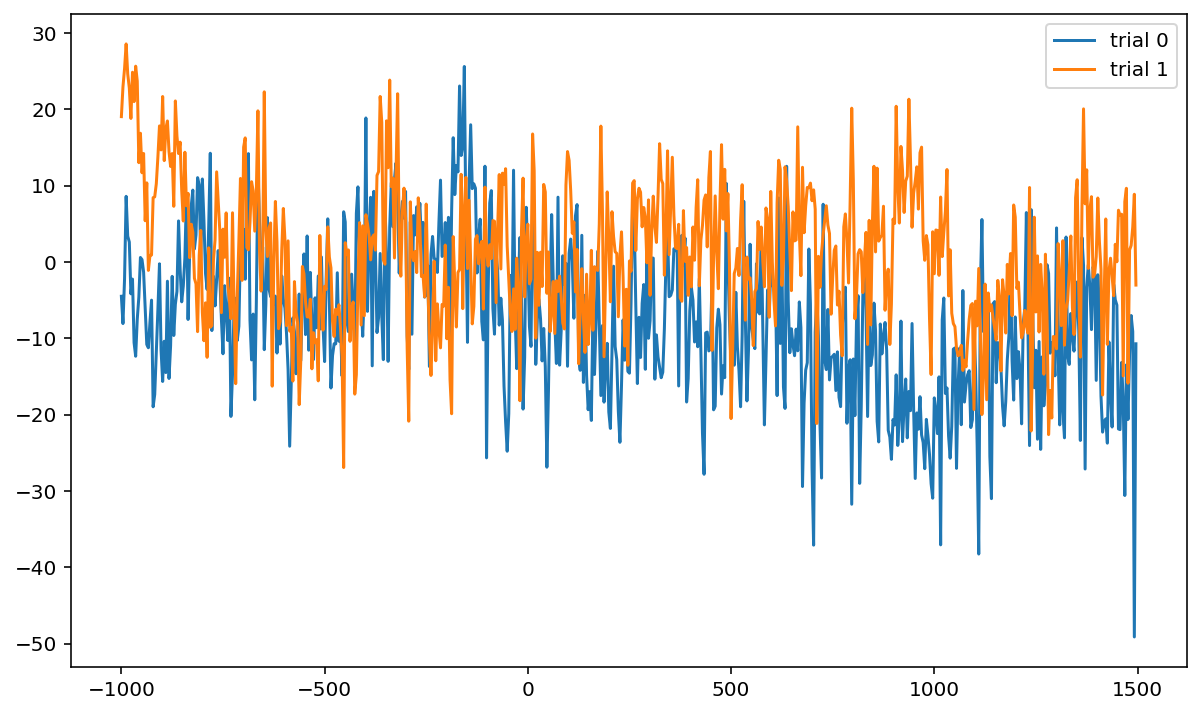

In [15]:
plt.plot(time, eegs[2,:,0], label='trial 0')
plt.plot(time, eegs[2,:,1], label='trial 1')
# if you want more plots overlaid, just keep plotting...
plt.legend();

# Subplots

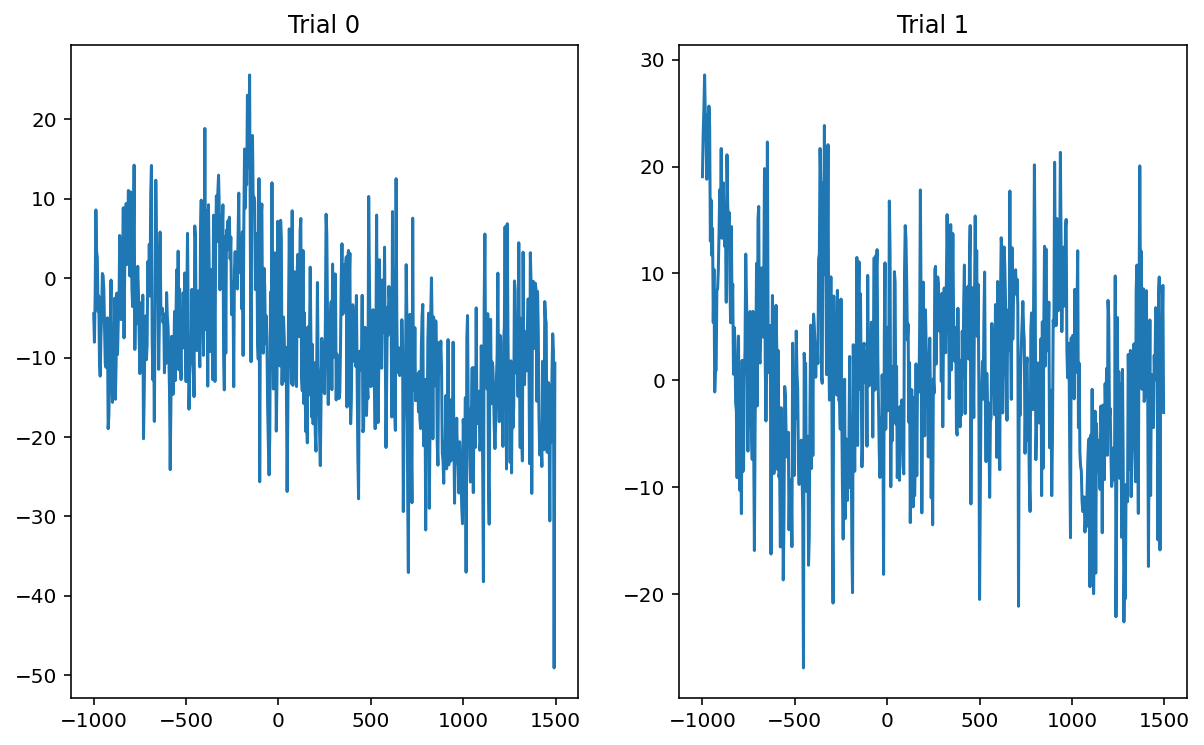

In [16]:
plt.subplot(1,2,1)
plt.plot(time, eegs[2,:,0])
plt.title('Trial 0')

plt.subplot(122)
plt.plot(time, eegs[2,:,1])
plt.title('Trial 1');

# Shaded regions (e.g. confidence intervals)

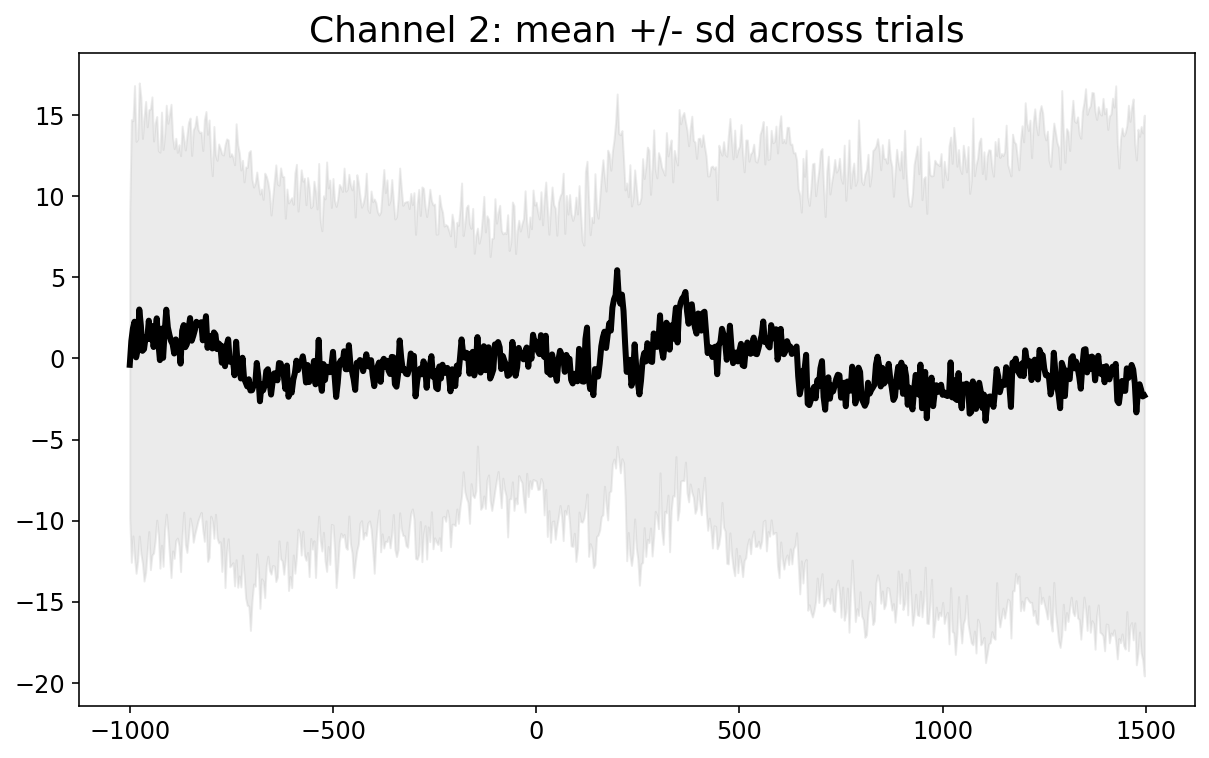

In [80]:
# mean and standard deviation for EEGs in channel 2 across all trials
avg = eegs[2].mean(axis=1)
std = eegs[2].std(axis=1)

plt.fill_between(time, avg - std, avg + std, alpha=0.25, color=(0.7,0.7,0.7))
plt.plot(time, avg, lw=3, color='k')
plt.title('Channel 2: mean +/- sd across trials');

# Scatter plot

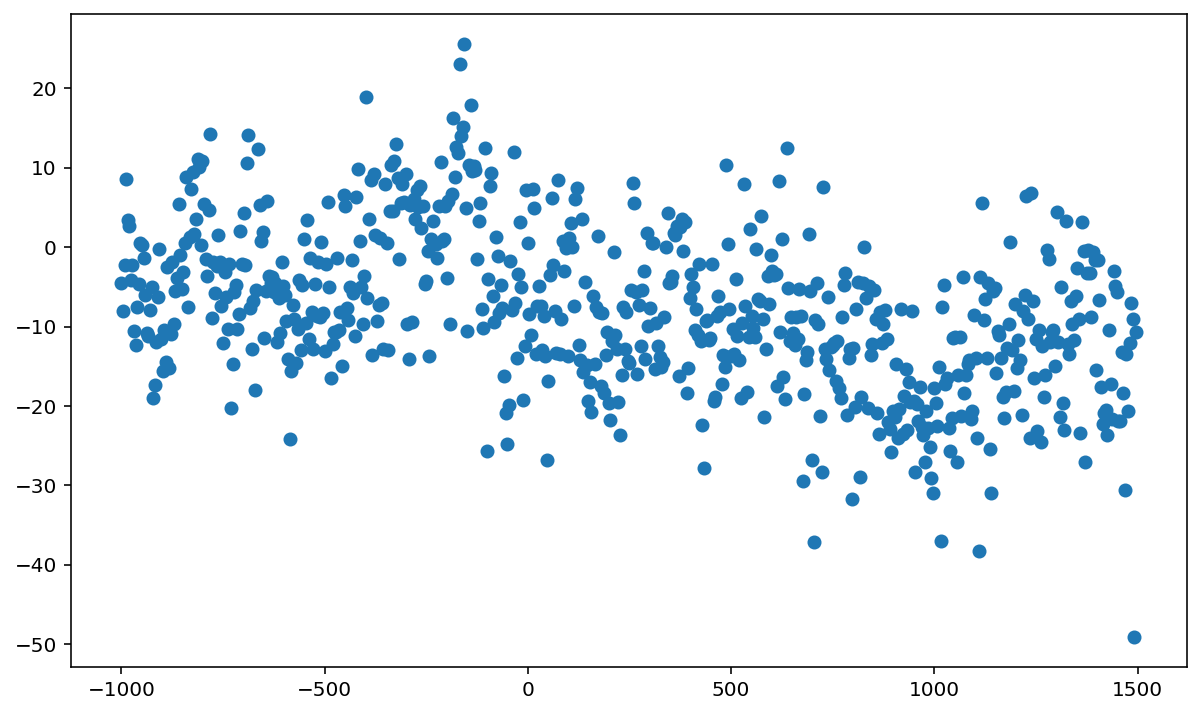

In [17]:
plt.scatter(time, eegs[2,:,0]);

# Style by data point

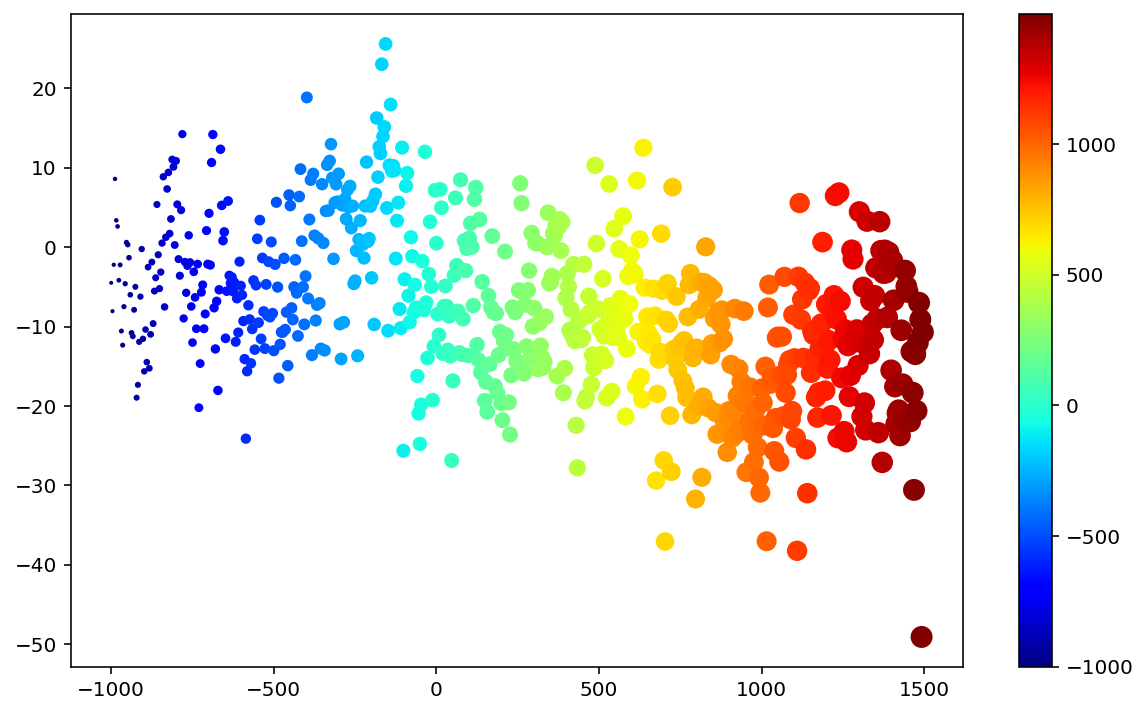

In [18]:
import numpy as np

# length 640 array from 1-100
markersizes = np.linspace(1, 100, 640)

plt.scatter(time, eegs[2,:,0], c=time, s=markersizes, cmap='jet')

plt.colorbar();

# 3D plot

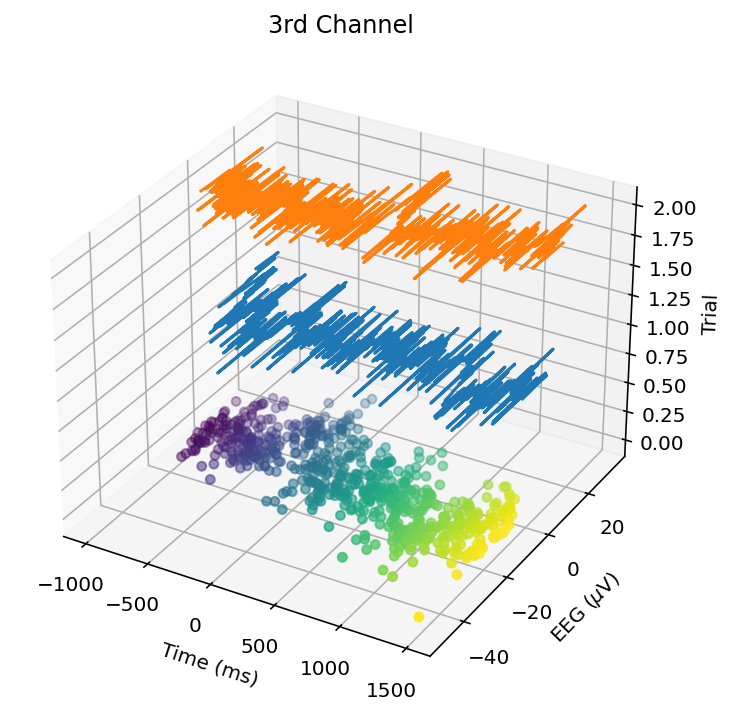

In [19]:
from mpl_toolkits import mplot3d  # for 3d plots

ax = plt.subplot(111, projection='3d')
ax.scatter(time, eegs[2,:,0], 0, c=time)
plt.plot(time, eegs[2,:,1], 1)
plt.plot(time, eegs[2,:,2], 2)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
ax.set_zlabel("Trial")
plt.title("3rd Channel");

# 3D viewpoint

!!! We will not cover this, but you can also enable interactive plot widgets so that you can rotate the plot with your mouse.

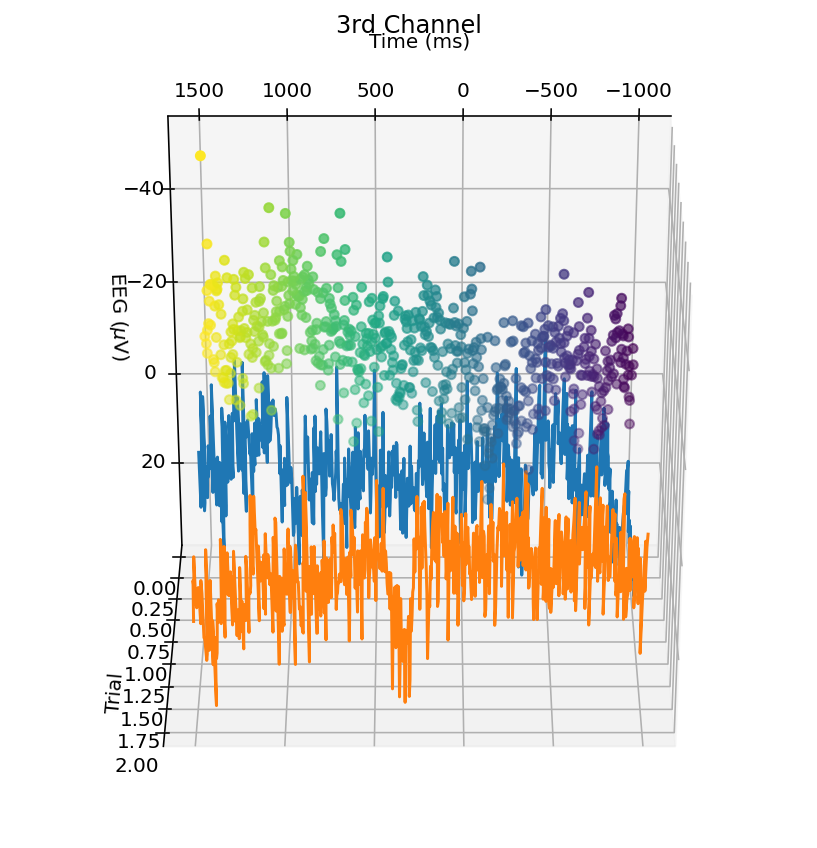

In [20]:
ax = plt.subplot(1, 1, 1, projection='3d')
ax.scatter(time, eegs[2,:,0], 0, c=time)
plt.plot(time, eegs[2,:,1], 1)
plt.plot(time, eegs[2,:,2], 2)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
ax.set_zlabel("Trial")
plt.title("3rd Channel")
ax.azim = 90  # azimuth
ax.elev = 120;  # elevation
plt.tight_layout();  # fix any axis label overlap issues

# Axes labels

## <font color=red>!!! You MUST ALWAYS have axes labels on all of your plots.</font>

## In many of the examples above, I omitted axis labels only so we could focus on the plotting code. Do NOT do this in your homework or on exams!!!

In [62]:
# let's make all axes labels a bit bigger than the default
plt.rcParams['axes.titlesize'] = 18  # axes title
plt.rcParams['axes.labelsize'] = 18    # axes labels
plt.rcParams['xtick.labelsize'] = 12    # x axis tick labels
plt.rcParams['ytick.labelsize'] = 12    # y axis tick labels

# 1D Histogram

### For displaying the distribution of a one-dimensional series of values.

e.g. the distribution of EEG amplitudes ($\mu$V) for an entire recording.

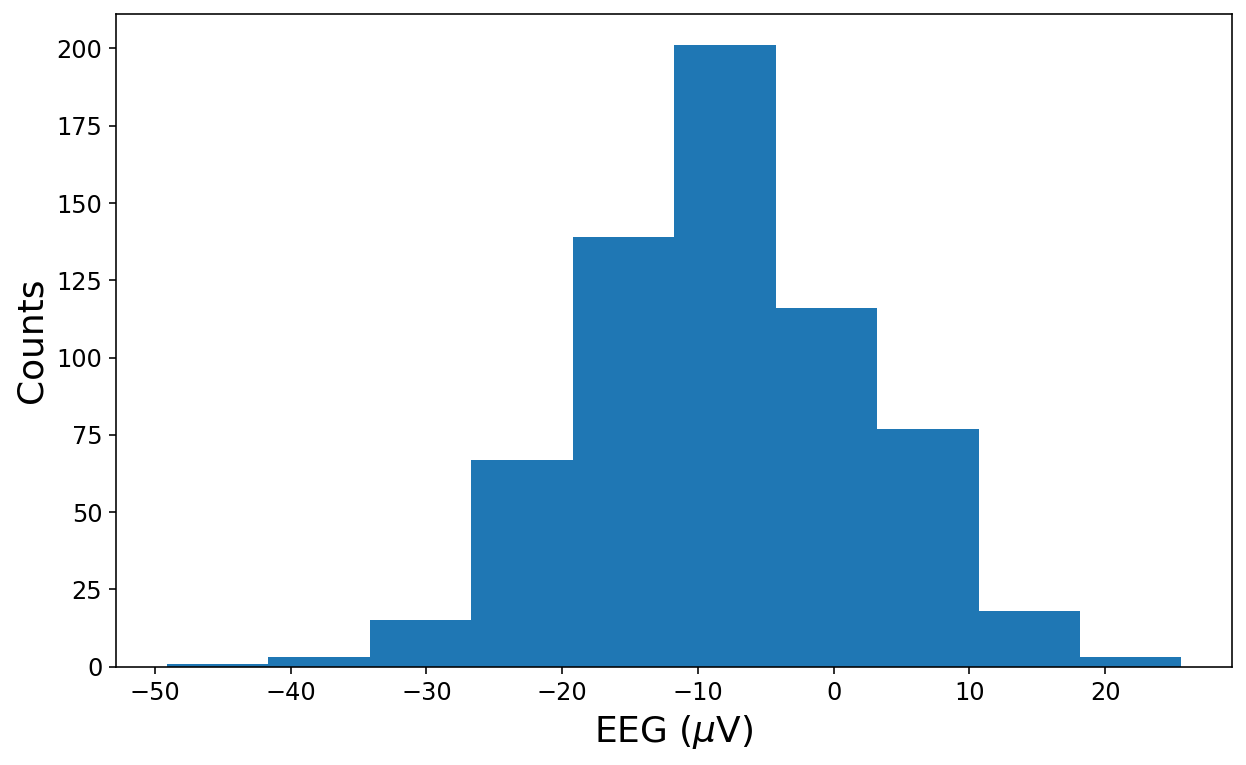

In [22]:
plt.hist(eegs[2,:,0])

plt.xlabel("EEG ($\mu$V)")
plt.ylabel("Counts");

# Histogram binning

### <font color=red>How you bin the data can drastically affect the look and interpretability of the plot.</font>

### There is no correct choice of binning, but you should use something that conveys what you are trying to show. <font color=red>Try changing the binning in the example below.</font>

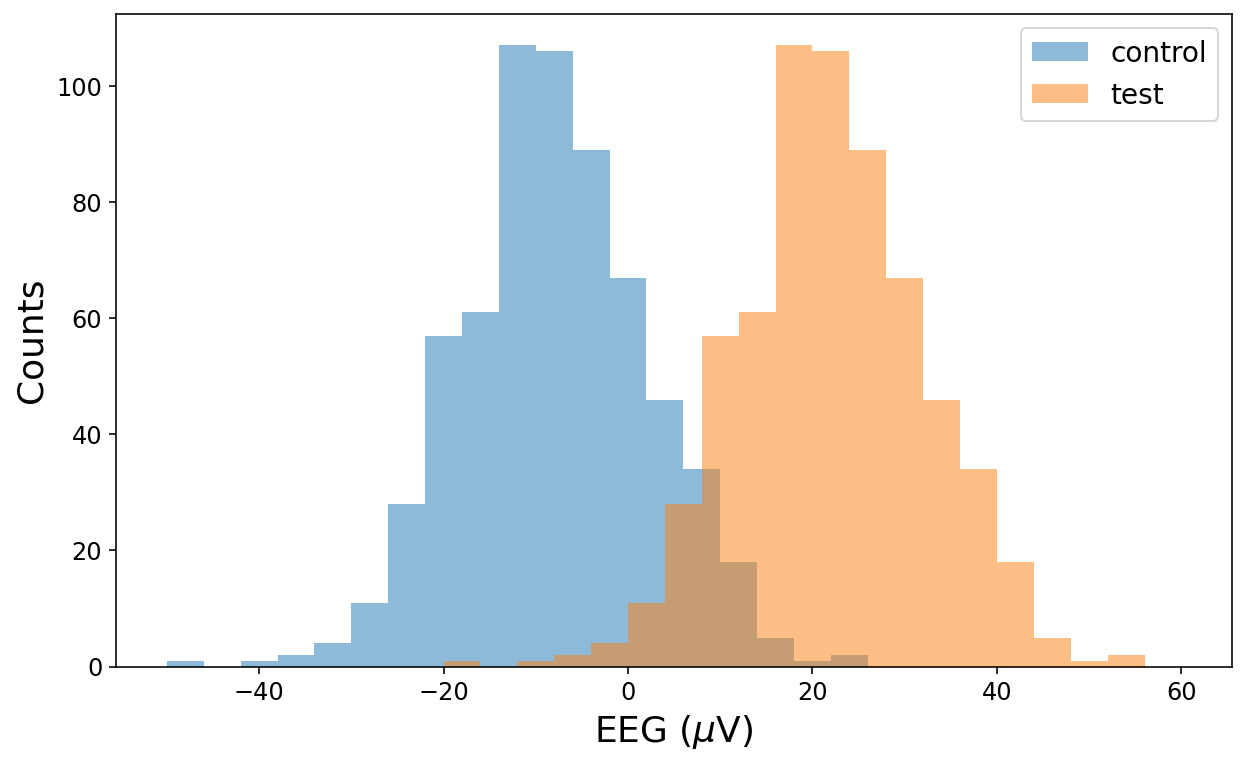

In [23]:
import numpy as np

# 20 bins from -50 to 30
binedges = np.linspace(-50, 30, 21)

plt.hist(eegs[2,:,0], binedges, alpha=0.5, label='control')
plt.hist(eegs[2,:,0] + 30, binedges + 30, alpha=0.5, label='test')  # shifted by +30 in uV
plt.xlabel("EEG ($\mu$V)")
plt.ylabel("Counts")
plt.legend(fontsize=14);

# Bar plot

## For plotting data in separate categories.

## <font color=red>!!! Although still useful in some cases, we will cover potentially better options for categorical plots in just a bit.</font>

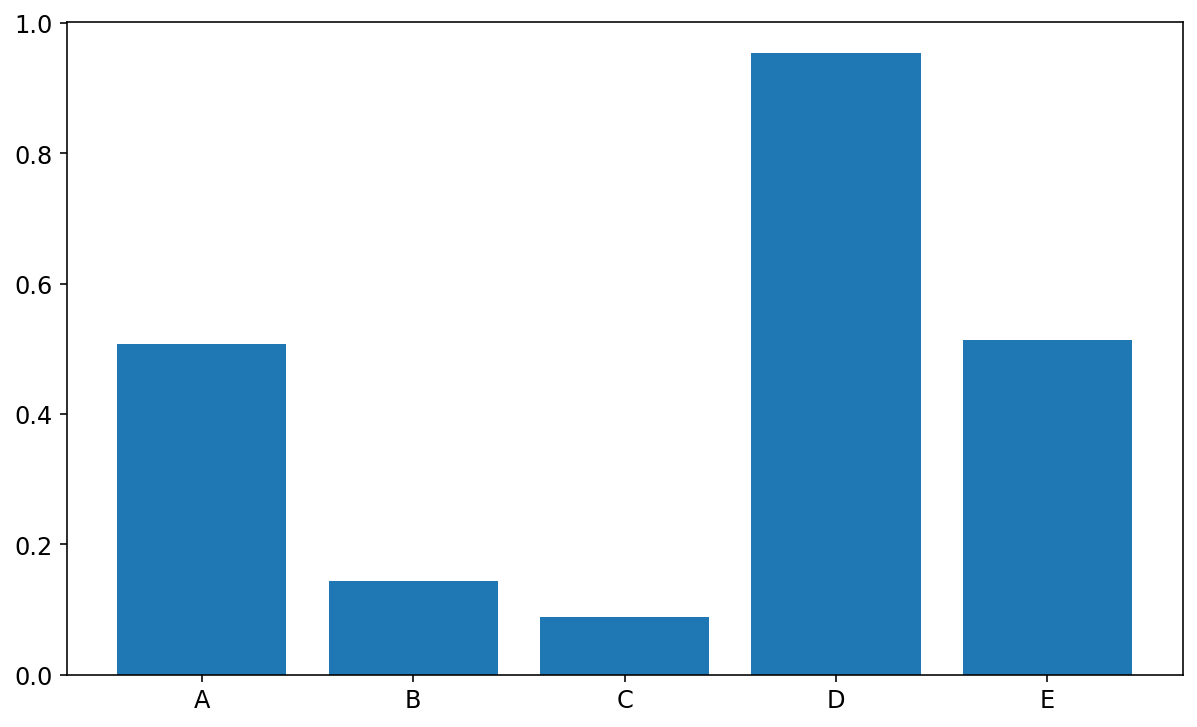

In [24]:
categoryLabels = ['A', 'B', 'C', 'D', 'E']
categoryValues = np.random.random(5)

plt.bar(categoryLabels, categoryValues);

# Bar plot

## <font color=red>!!! Not showing the full y axis can misrepresent differences between categories.</font>

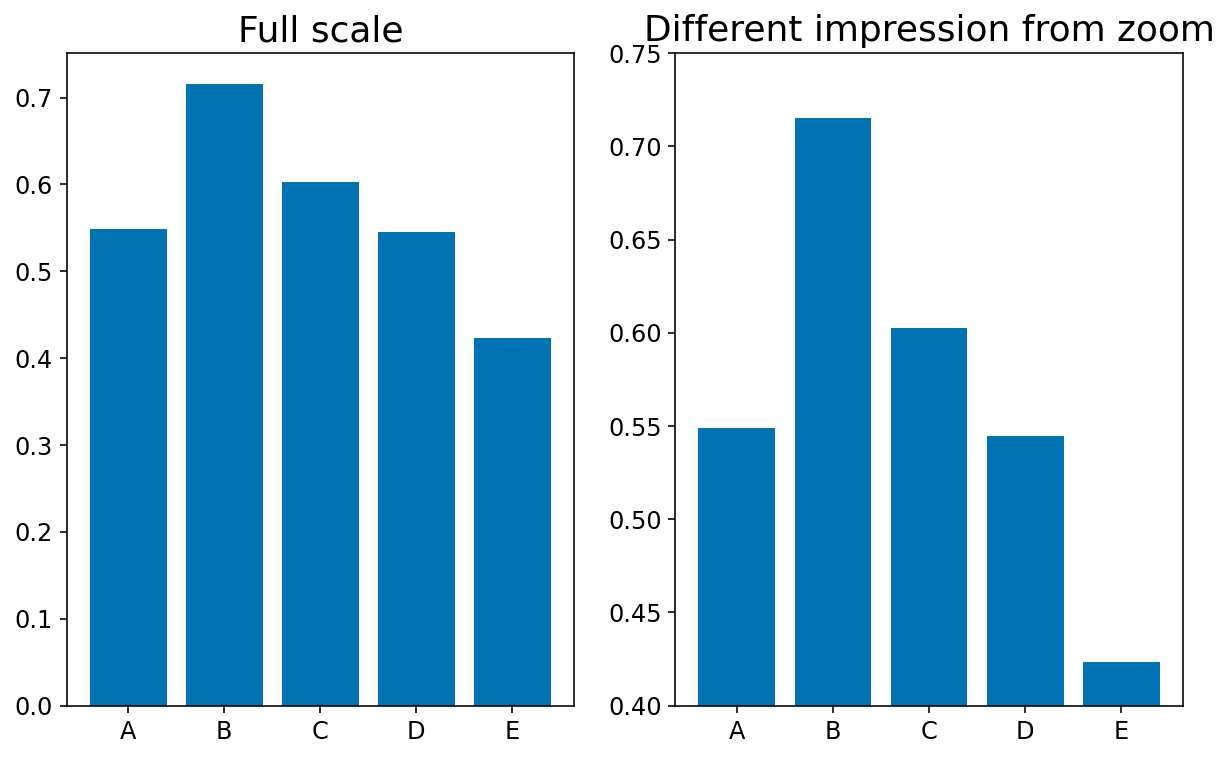

In [64]:
categoryLabels = ['A', 'B', 'C', 'D', 'E']
np.random.seed(0)
categoryValues = np.random.random(5)

plt.subplot(1,2,1)
plt.bar(categoryLabels, categoryValues)
plt.title('Full scale')

plt.subplot(1,2,2)
plt.bar(categoryLabels, categoryValues)
plt.ylim([0.4,0.75])
plt.title('Different impression from zoom');

# Images

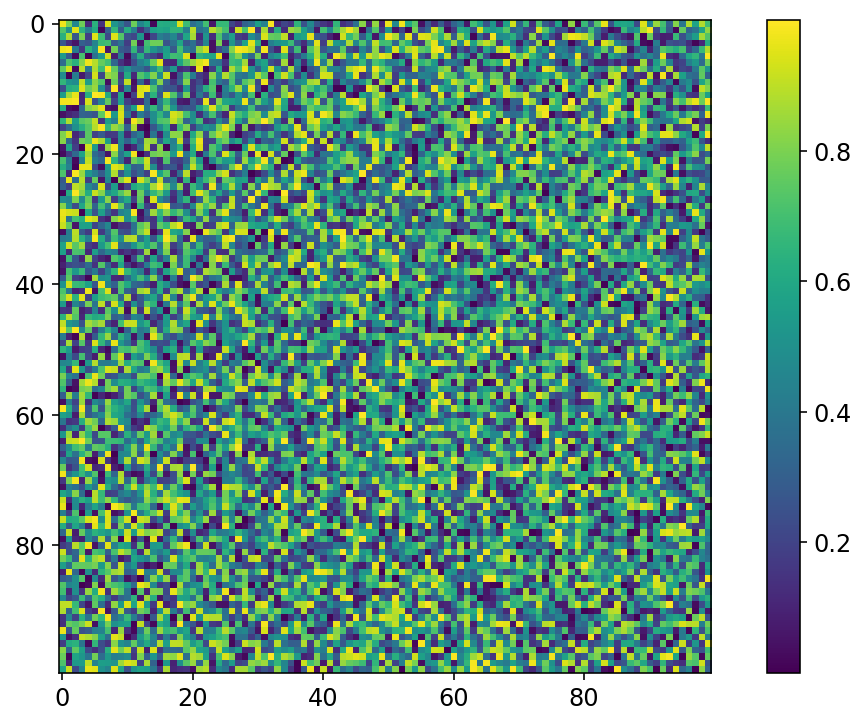

In [29]:
noise = np.random.random((100,100))

plt.imshow(noise, cmap='viridis')
plt.colorbar();

# Seaborn module

https://seaborn.pydata.org/

    >>> conda install seaborn

### !!! Seaborn wants data in the form of Pandas dataframes.

In [117]:
import seaborn as sns
import pandas as pd

#dir(sns)  # lots of plots available

## You can choose your default color pallete

In [31]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [32]:
sns.set_palette("colorblind")

# fMRI dataset

In [33]:
fmri = sns.load_dataset("fmri")

fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

# Scatter plot of relation between two columns

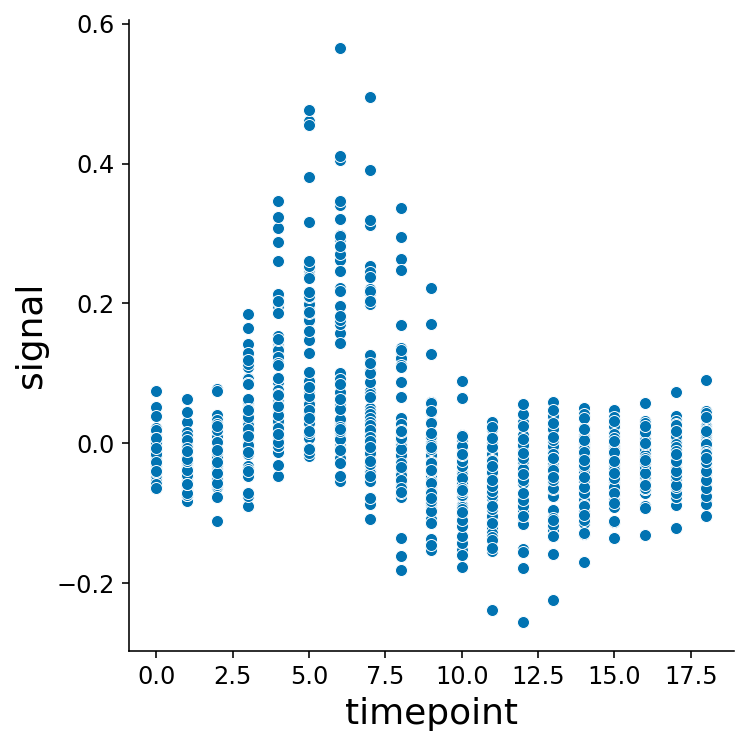

In [66]:
sns.relplot(x="timepoint", y="signal", data=fmri);

# You can plot NumPy arrays without using Pandas as well

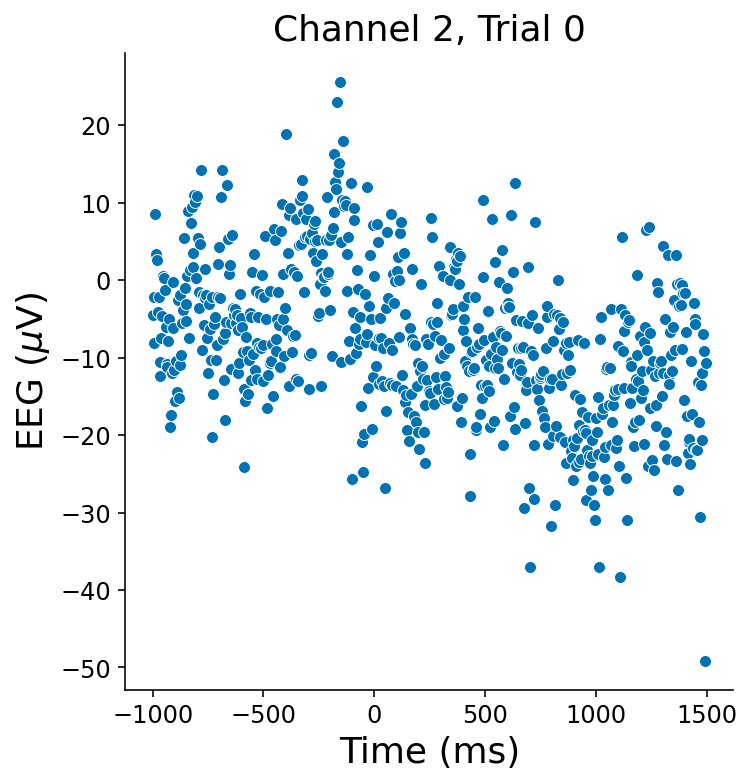

In [120]:
sns.relplot(x=time, y=eegs[2,:,0]);
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)')
plt.title('Channel 2, Trial 0');

# Scatter plot colored by event value

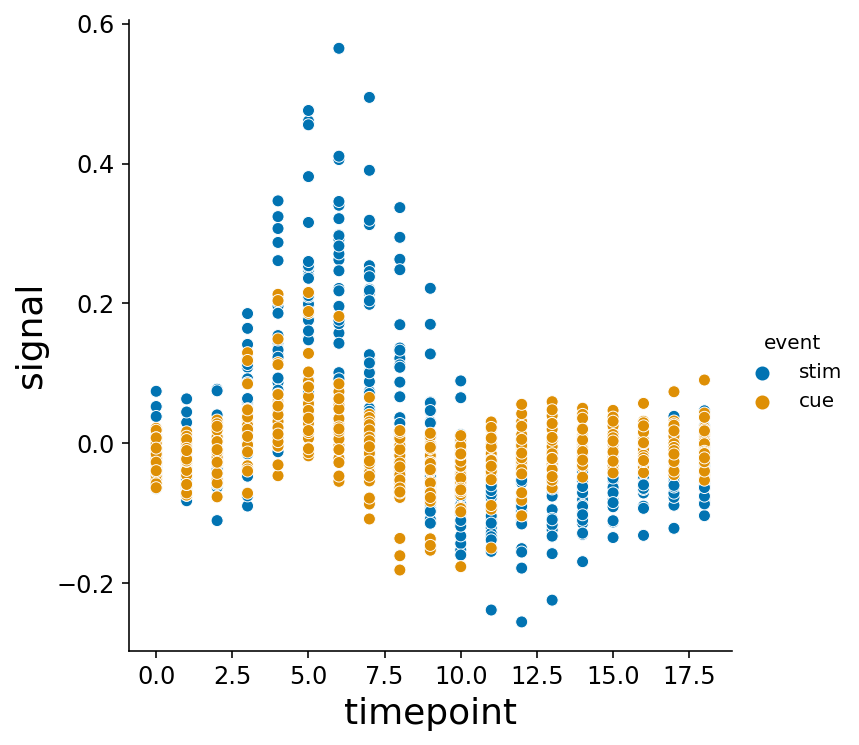

In [35]:
sns.relplot(x="timepoint", y="signal", hue="event", data=fmri);

# Scatter plot with color/marker set by event/subject values

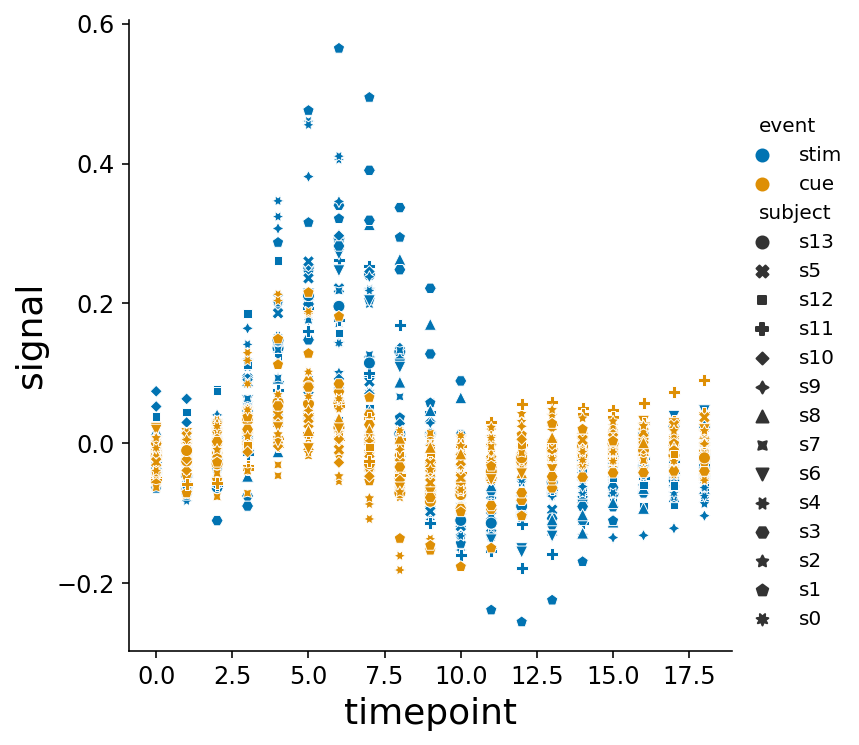

In [36]:
sns.relplot(x="timepoint", y="signal", hue="event", style="subject", data=fmri);

# Scatter plot with marker size set by region value

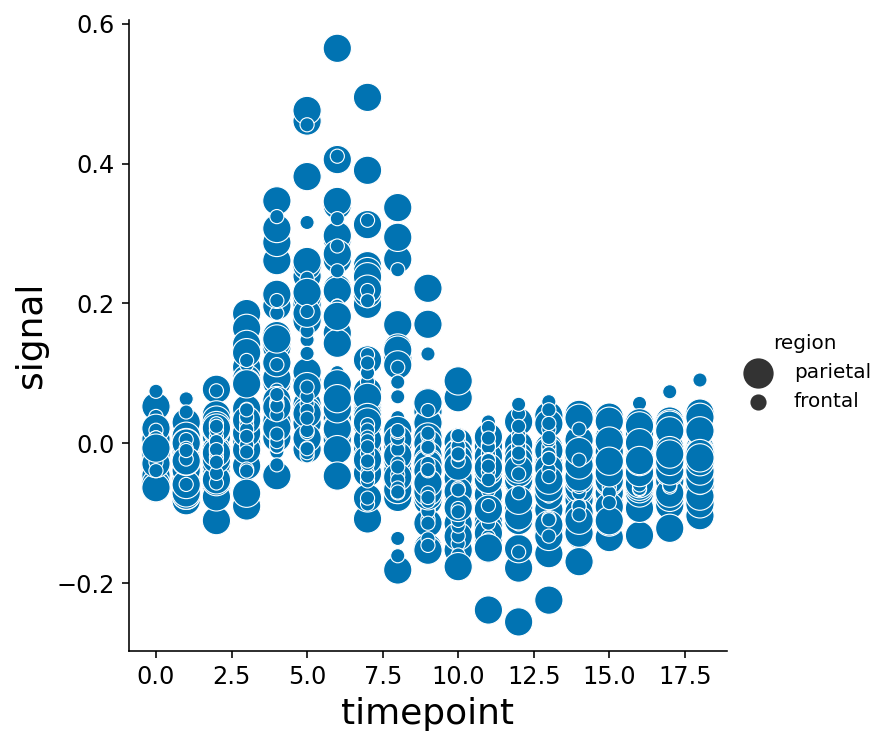

In [37]:
sns.relplot(x="timepoint", y="signal", size="region", sizes=(50,200), data=fmri);

# Line plot (mean +/- 95% confidence interval)

For multiple y values at a given x value, the mean and 95% confidence interval are plotted.

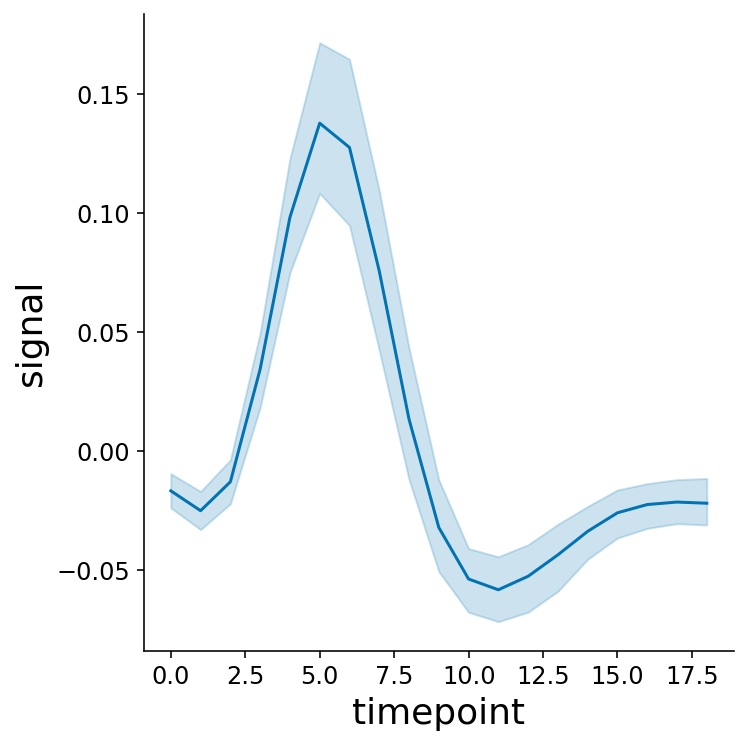

In [38]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

# Line plot (mean +/- standard deviation)

For multiple y values at a given x value, the mean and standard deviation are plotted.

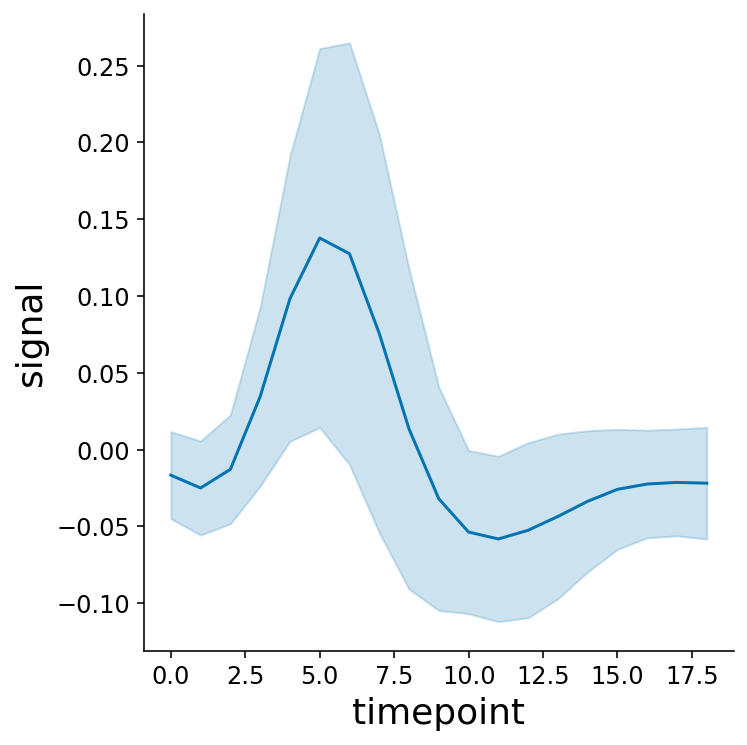

In [39]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

# Line plot (mean only)

For multiple y values at a given x value, the mean is plotted.

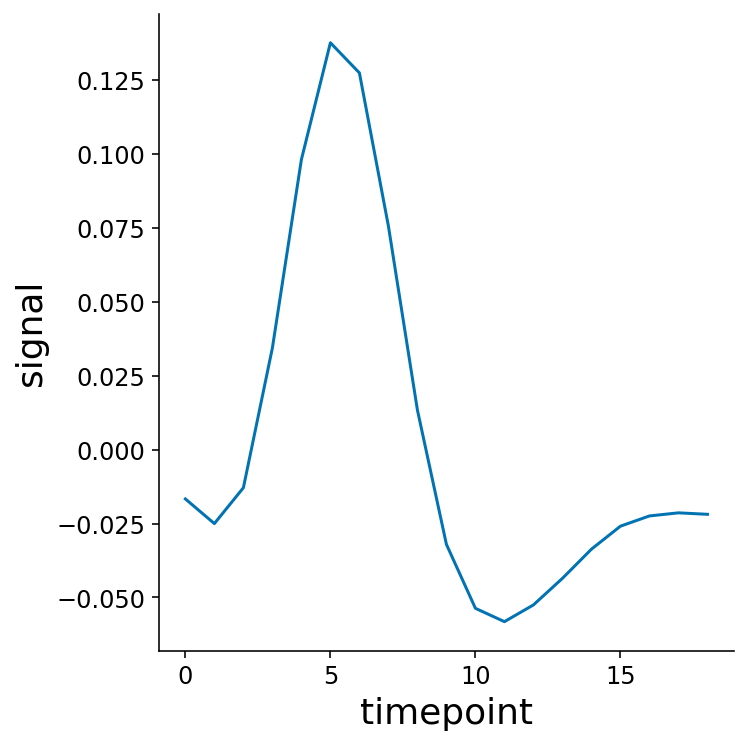

In [40]:
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri);

# Line plots by colored by event value

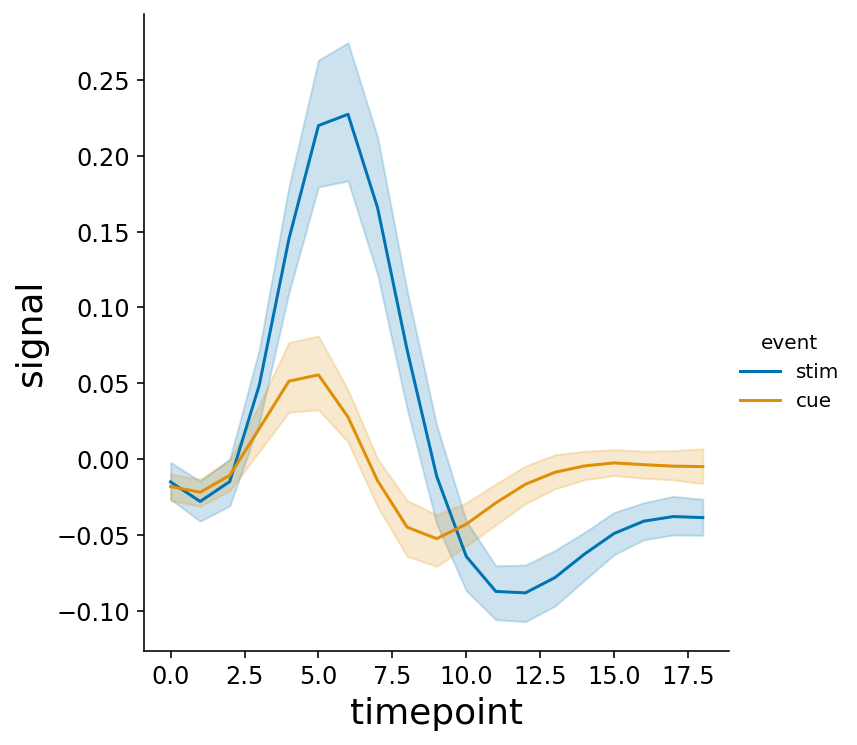

In [41]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

## <font color=red>Exercise</font>

* Change the above plot to show signal vs. time separated by brain region.
* Change the above plot to show signal vs. subject separated by brain region.

# Line plots colored/styled by region/event vlaues

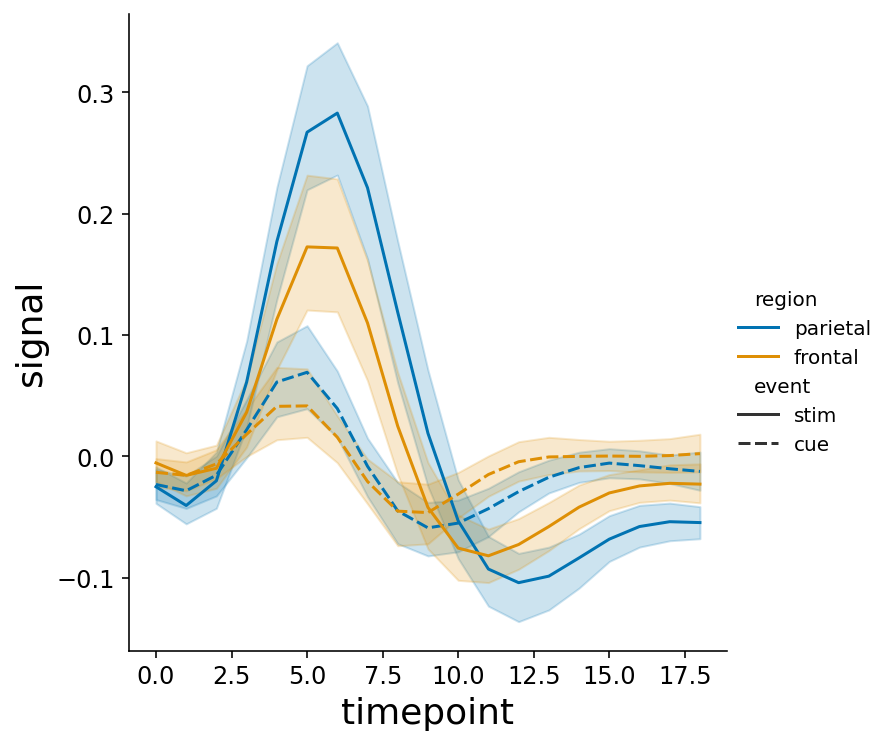

In [42]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri);

# Line plots for each subject colored by region vlaues

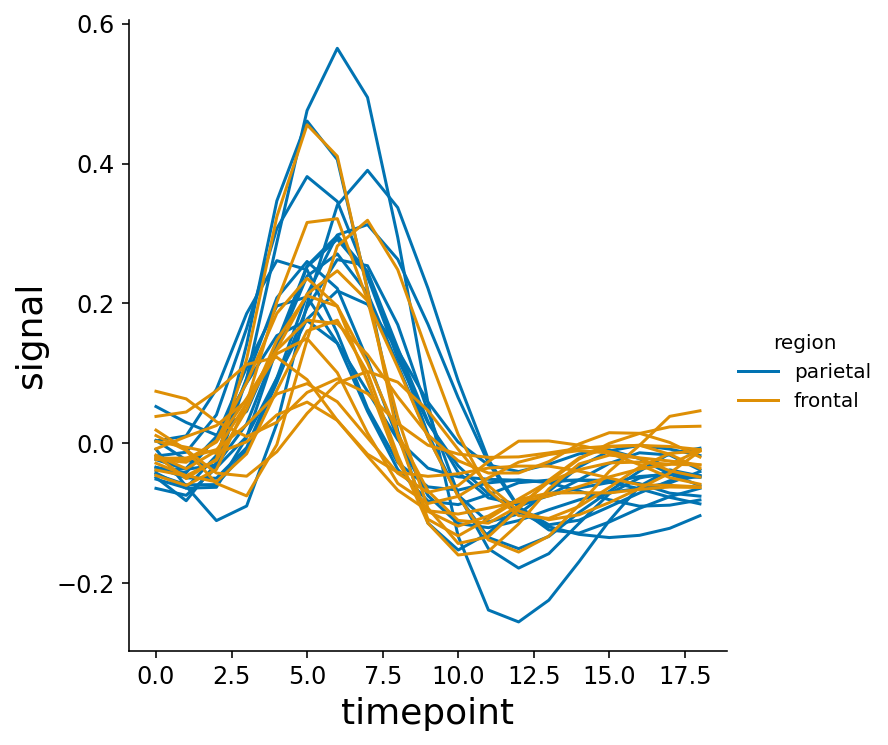

In [43]:
sns.relplot(x="timepoint", y="signal", hue="region", units="subject", \
            estimator=None, kind="line", data=fmri.query("event == 'stim'"));

# Multiple plots in a grid

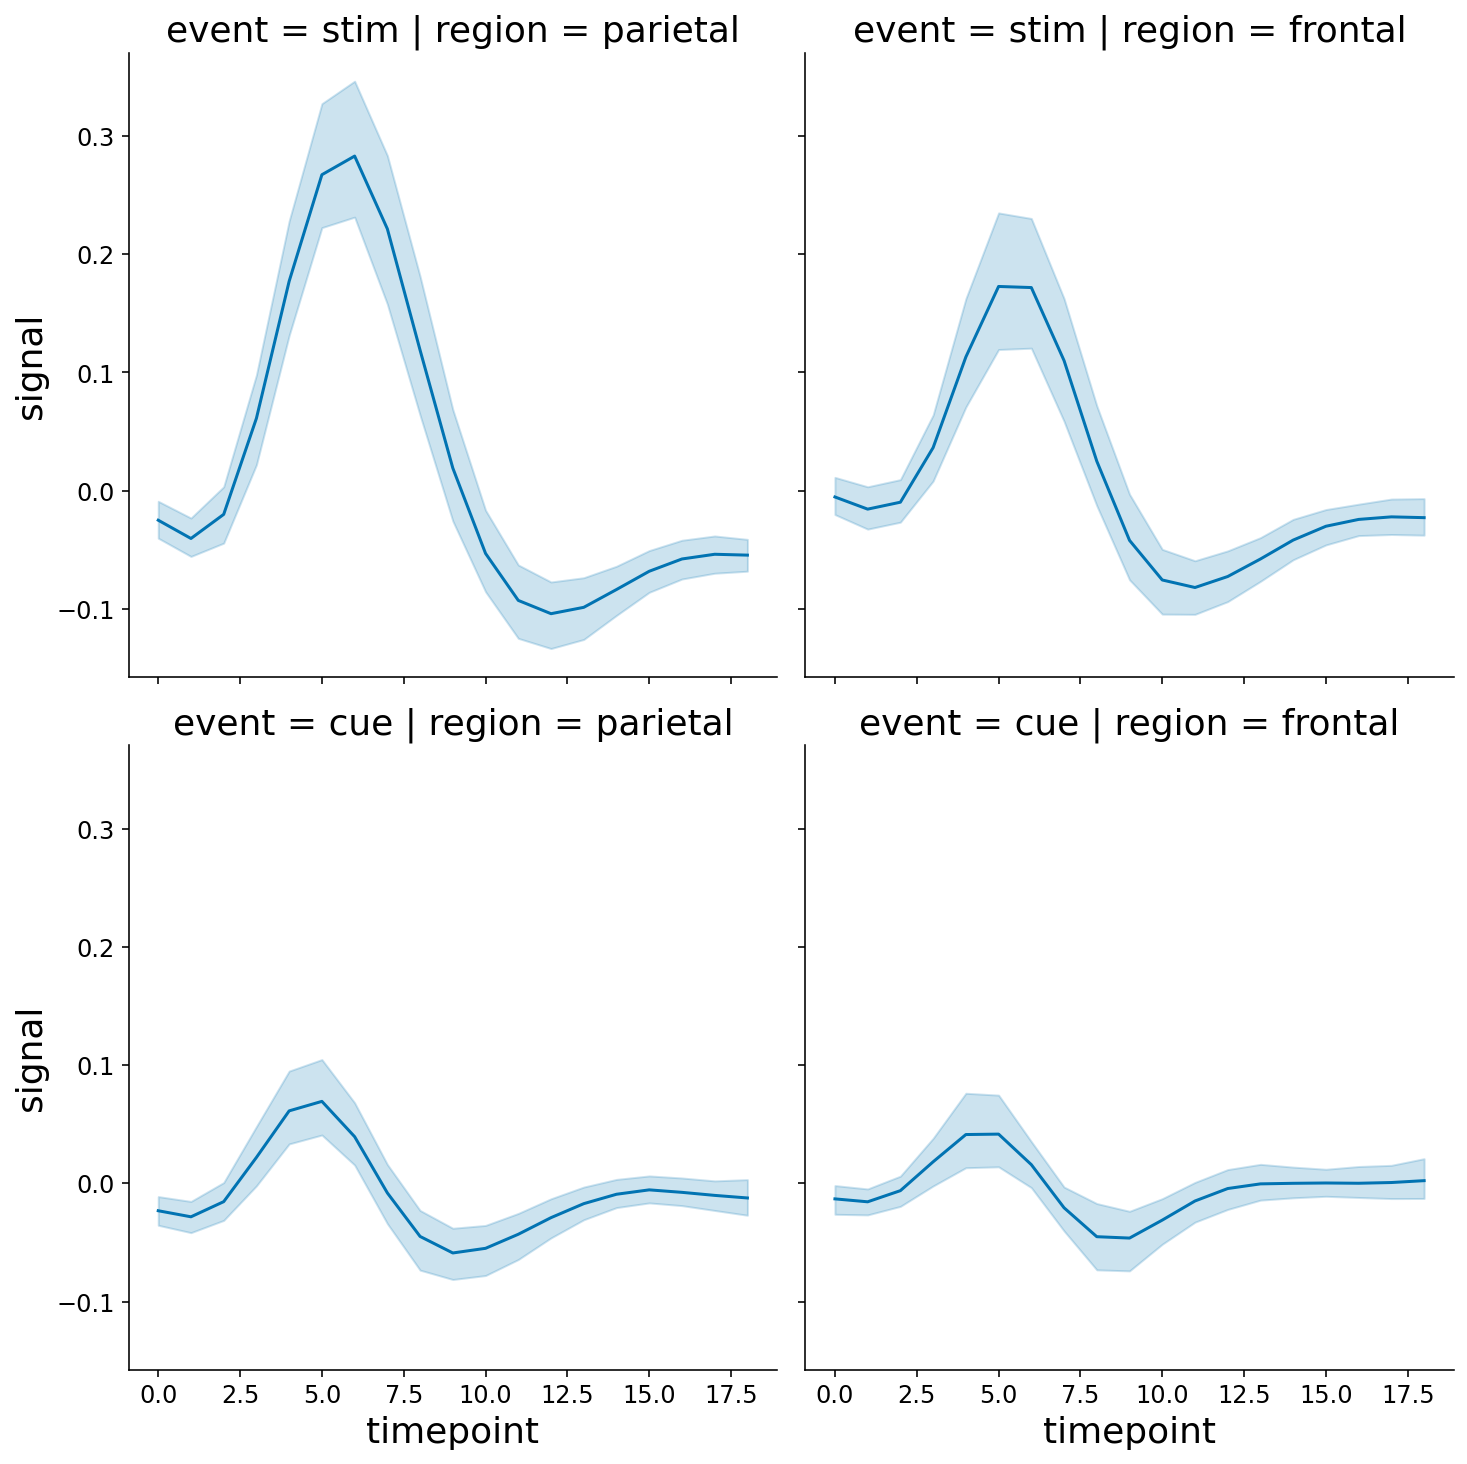

In [44]:
sns.relplot(x="timepoint", y="signal", row="event", col="region", kind="line", data=fmri);

# Multiple plots in a grid

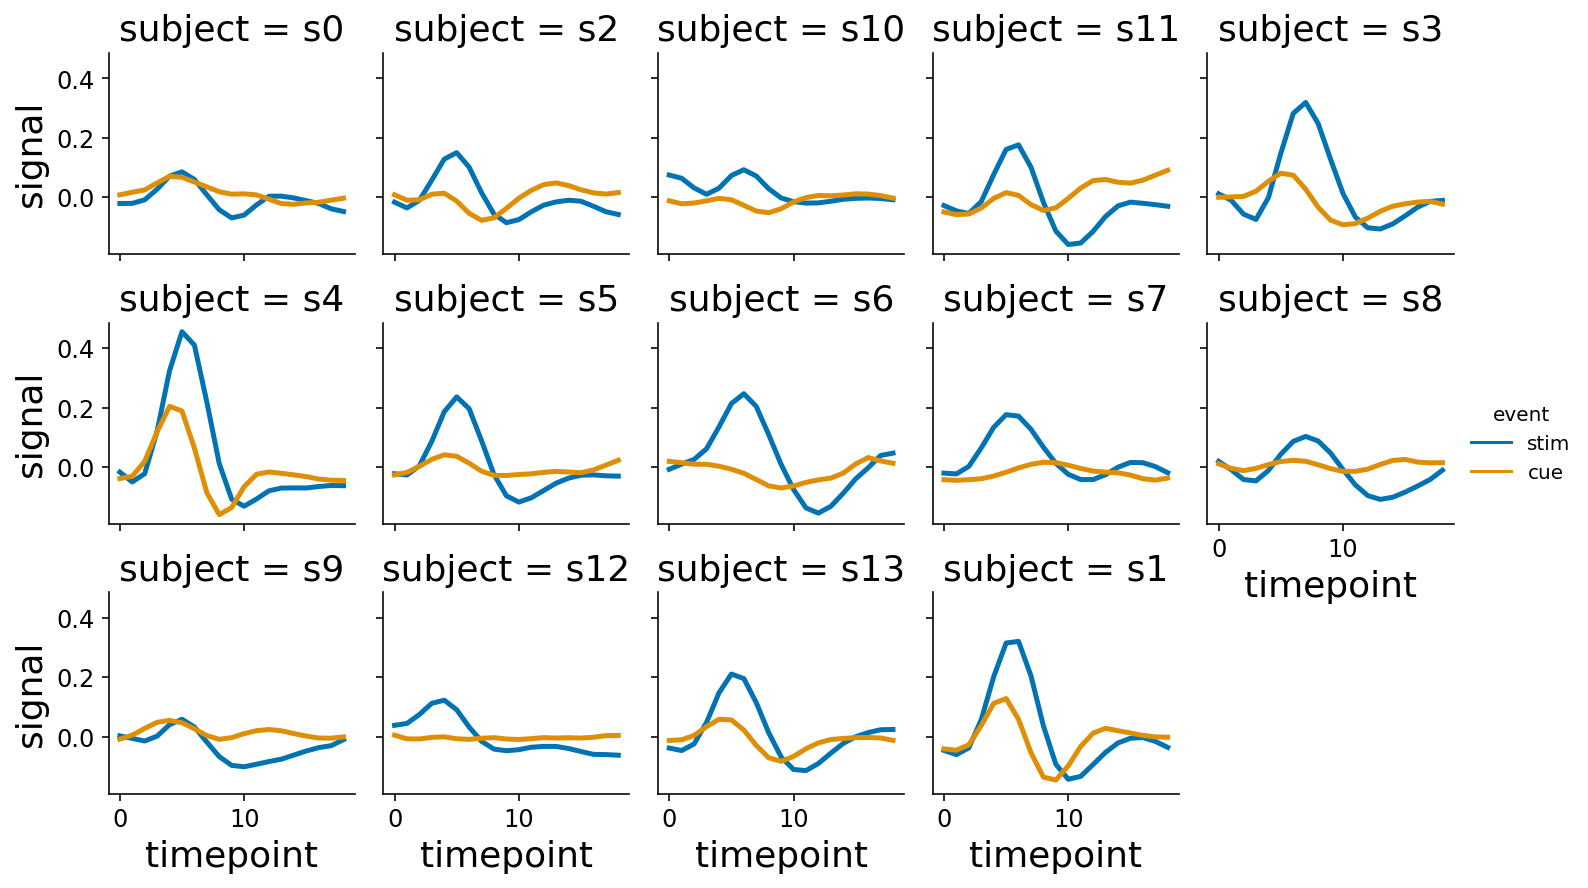

In [45]:
g = sns.relplot(x="timepoint", y="signal", col="subject", col_wrap=5, \
            hue="event", kind="line", data=fmri.query("region == 'frontal'"), \
            height=2, aspect=1, linewidth=2.5);
# plt.setp(g._legend.get_title(), fontsize='18');
# plt.setp(g._legend.get_texts(), fontsize='14');

# Categorical scatter plot

### Great for getting a birds eye view of your data.

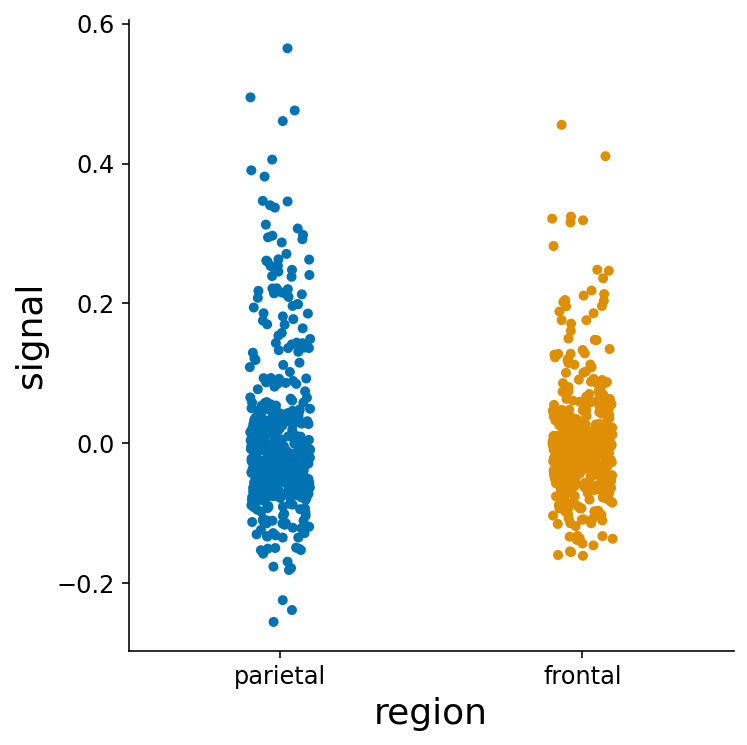

In [46]:
sns.catplot(x="region", y="signal", data=fmri);

# Categorical scatter plot along horizontal

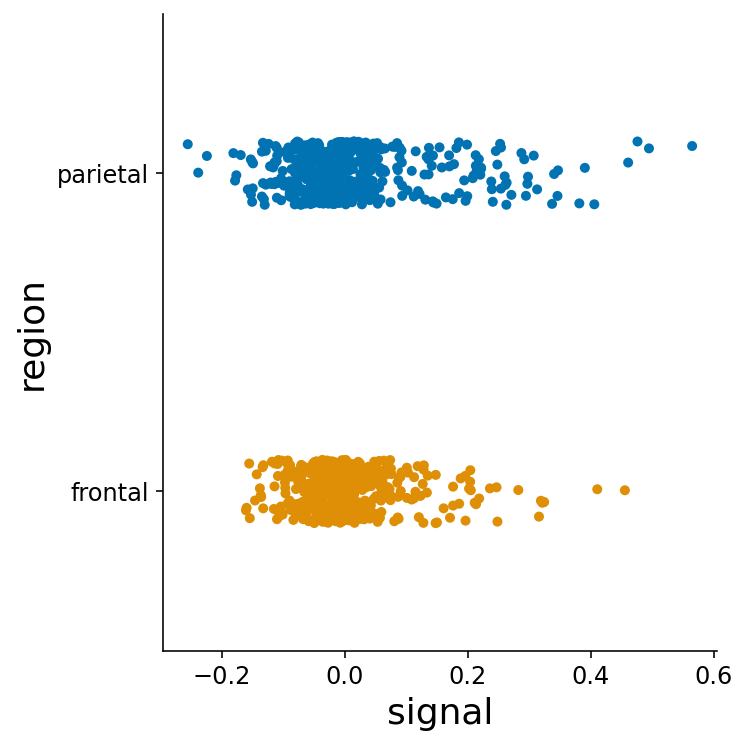

In [47]:
sns.catplot(x="signal", y="region", data=fmri);

# Categorical swarm plot

### In a swarm plot the datapoints are not allowed to overlap.

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


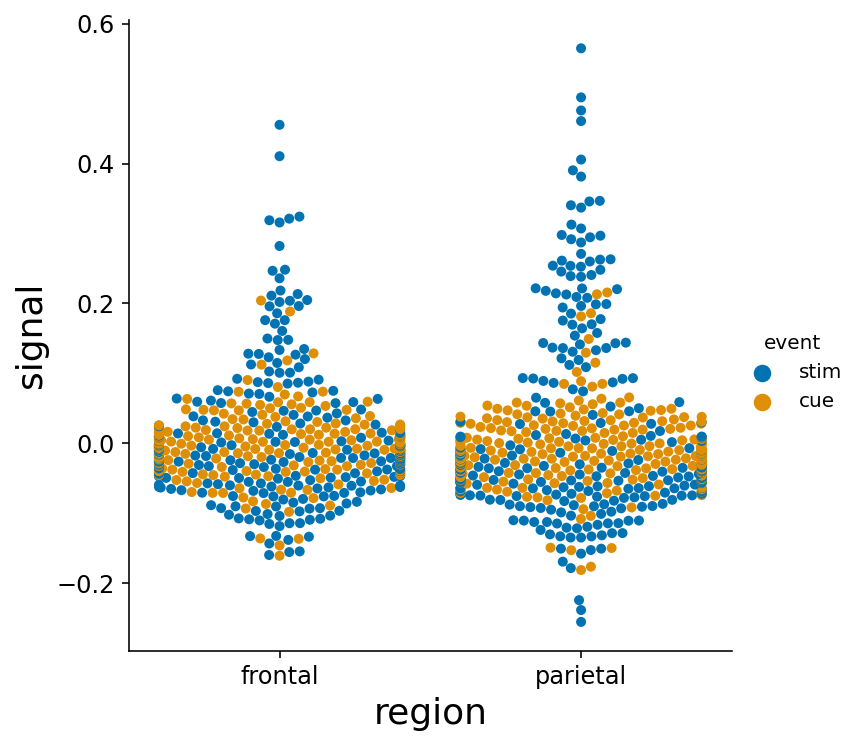

In [98]:
sns.catplot(x="region", y="signal", hue="event", kind="swarm", s=5, \
            order=["frontal", "parietal"], data=fmri);

# Violin plot

### Simplifies view while retaining a sense of how your data points are distributed.

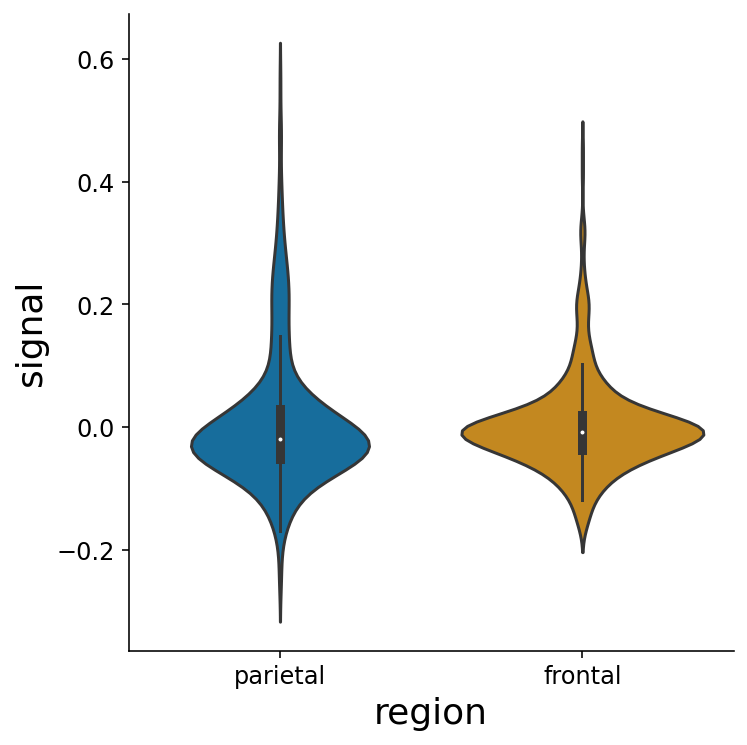

In [49]:
sns.catplot(x="region", y="signal", kind="violin", data=fmri);

# Combining categorical plots

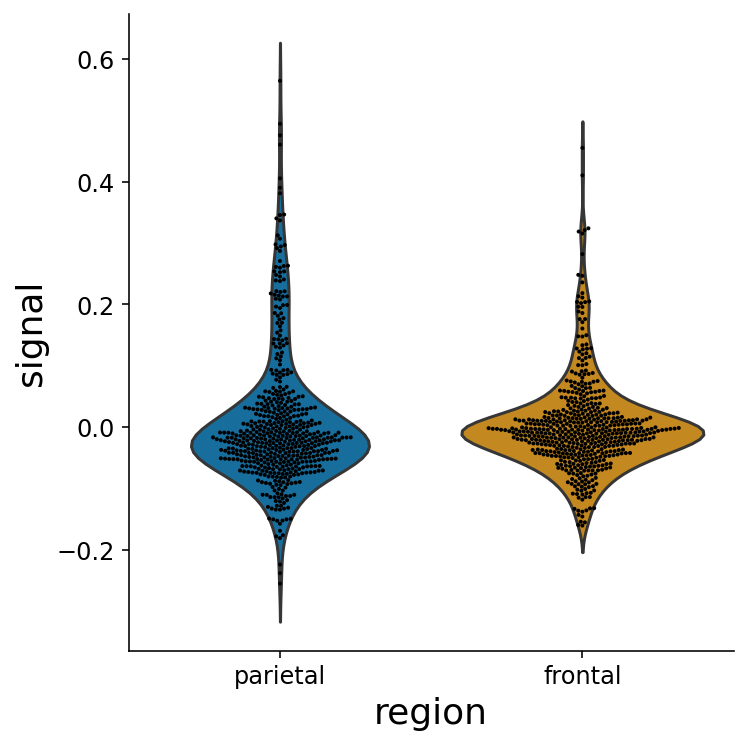

In [50]:
g = sns.catplot(x="region", y="signal", kind="violin", inner=None, data=fmri)
sns.swarmplot(x="region", y="signal", color="k", s=2, data=fmri, ax=g.ax);

# Bar plot

### Simplistic view of data statistics (e.g. mean +/- confidence interval)

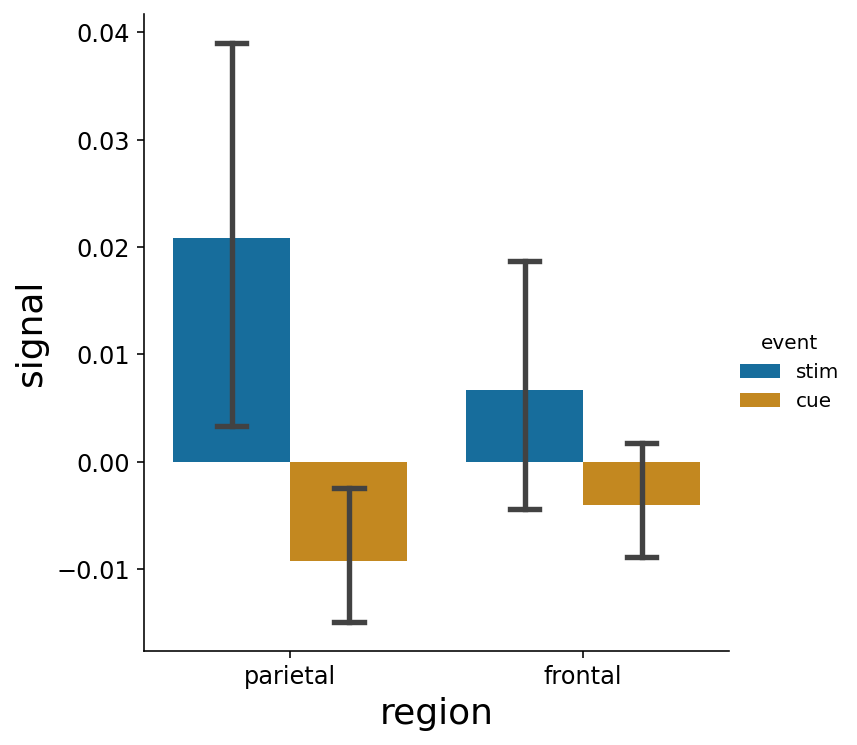

In [51]:
sns.catplot(x="region", y="signal", hue="event", kind="bar", \
            capsize=0.1, data=fmri);

# Bar plot with data points


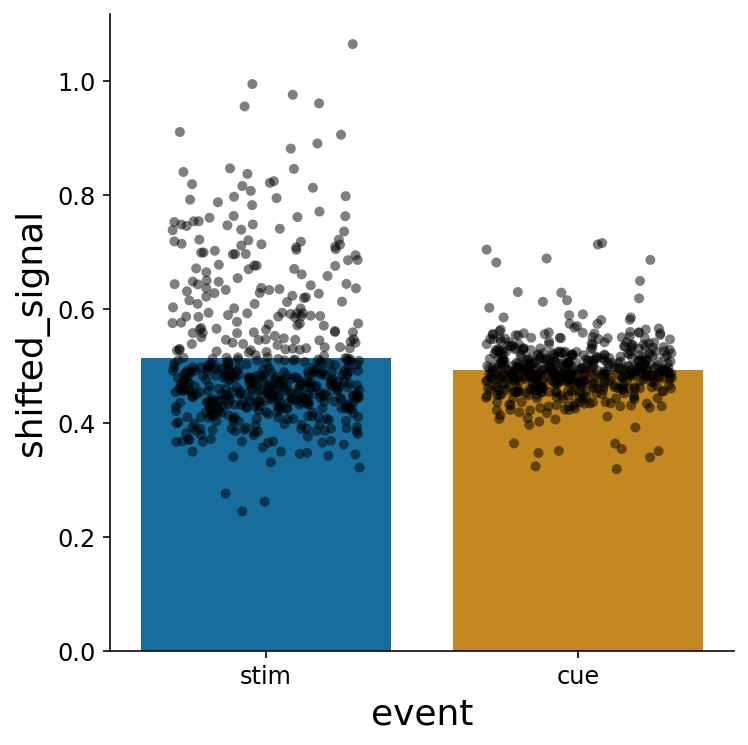

In [121]:
fmri['shifted_signal'] = fmri['signal'].to_numpy() + 0.5
sns.catplot(x="event", y="shifted_signal", kind="bar", ci=None, data=fmri);
sns.stripplot(x="event", y="shifted_signal", data=fmri, alpha=0.5, jitter=0.3, color='k');

# Which do you think better conveys the data?


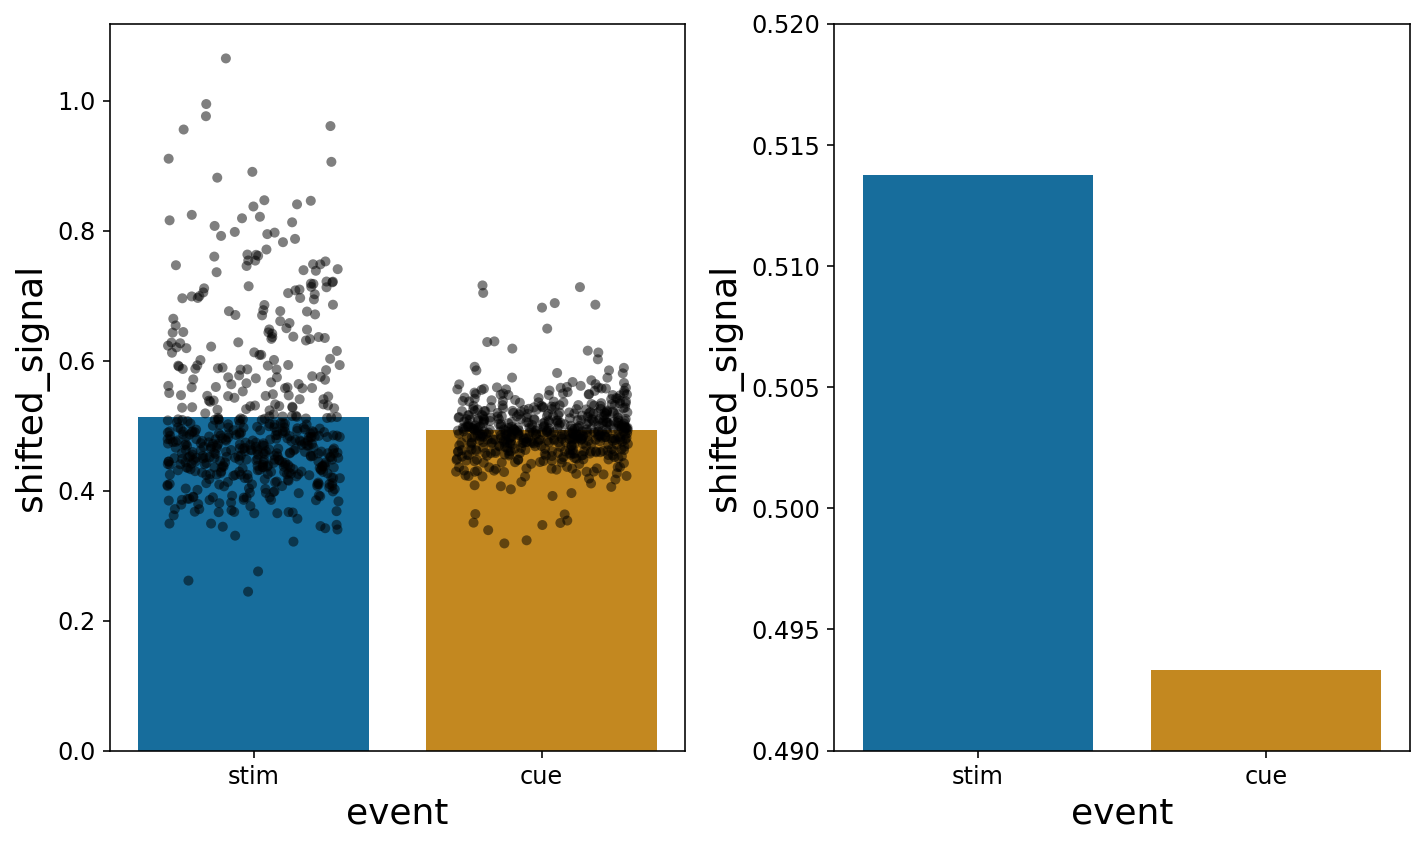

In [127]:
ax = plt.subplot(1,2,1)
sns.barplot(ax=ax, x="event", y="shifted_signal", ci=None, data=fmri);
sns.stripplot(ax=ax, x="event", y="shifted_signal", data=fmri, alpha=0.5, jitter=0.3, color='k');

plt.subplot(1,2,2)
sns.barplot(x="event", y="shifted_signal", ci=None, data=fmri)
plt.ylim([0.49, 0.52])

plt.tight_layout();  # fix any axis label overlap issues

# Box plot

### Extremely simplified view of how data is distributed into quartile chunks. 

Box lines indicate locations corresponde=ing to quartiles containing 25%, 50% (median), and 75% of the data. Whiskers extend to 1.5 of the inner quartile range. Points beyond whiskers are outliers.

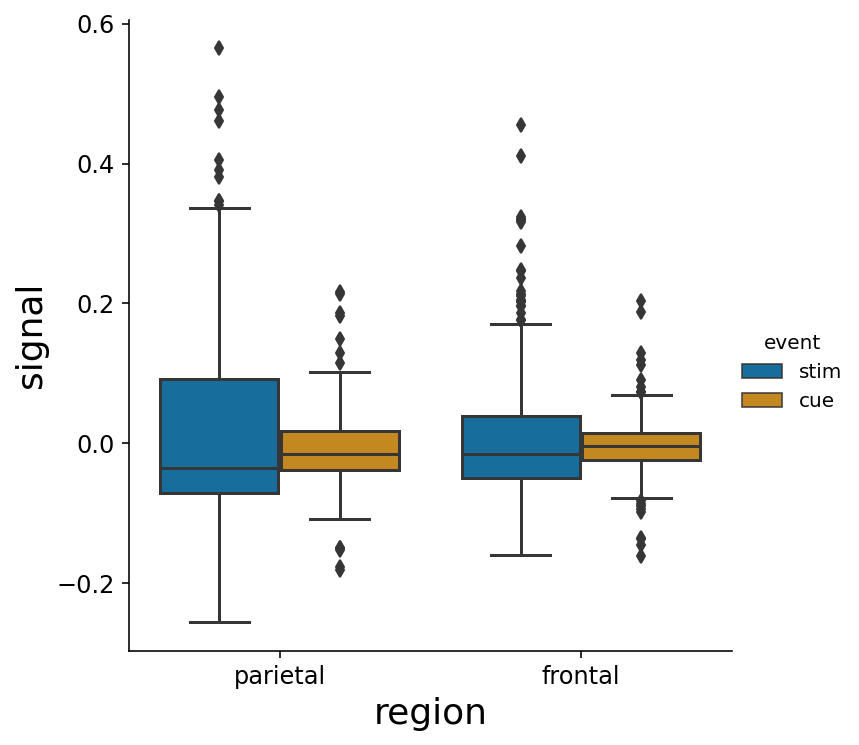

In [52]:
sns.catplot(x="region", y="signal", hue="event", kind="box", data=fmri);

# Categorical point plot

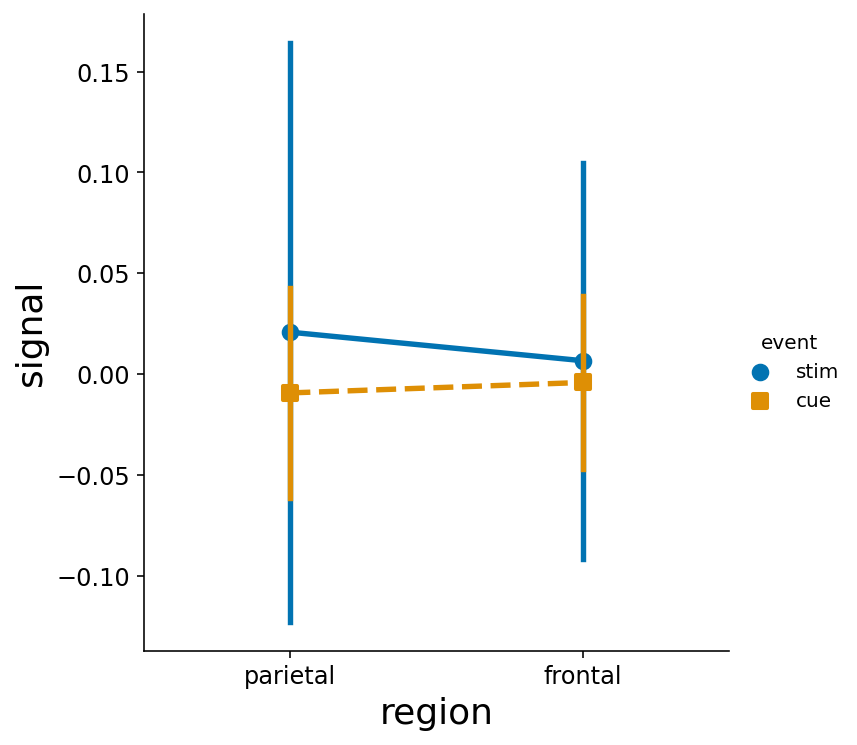

In [53]:
sns.catplot(x="region", y="signal", hue="event", kind="point", data=fmri, \
           ci="sd", markers=["o", "s"], linestyles=["-", "--"]);

# Multiple plots in a grid

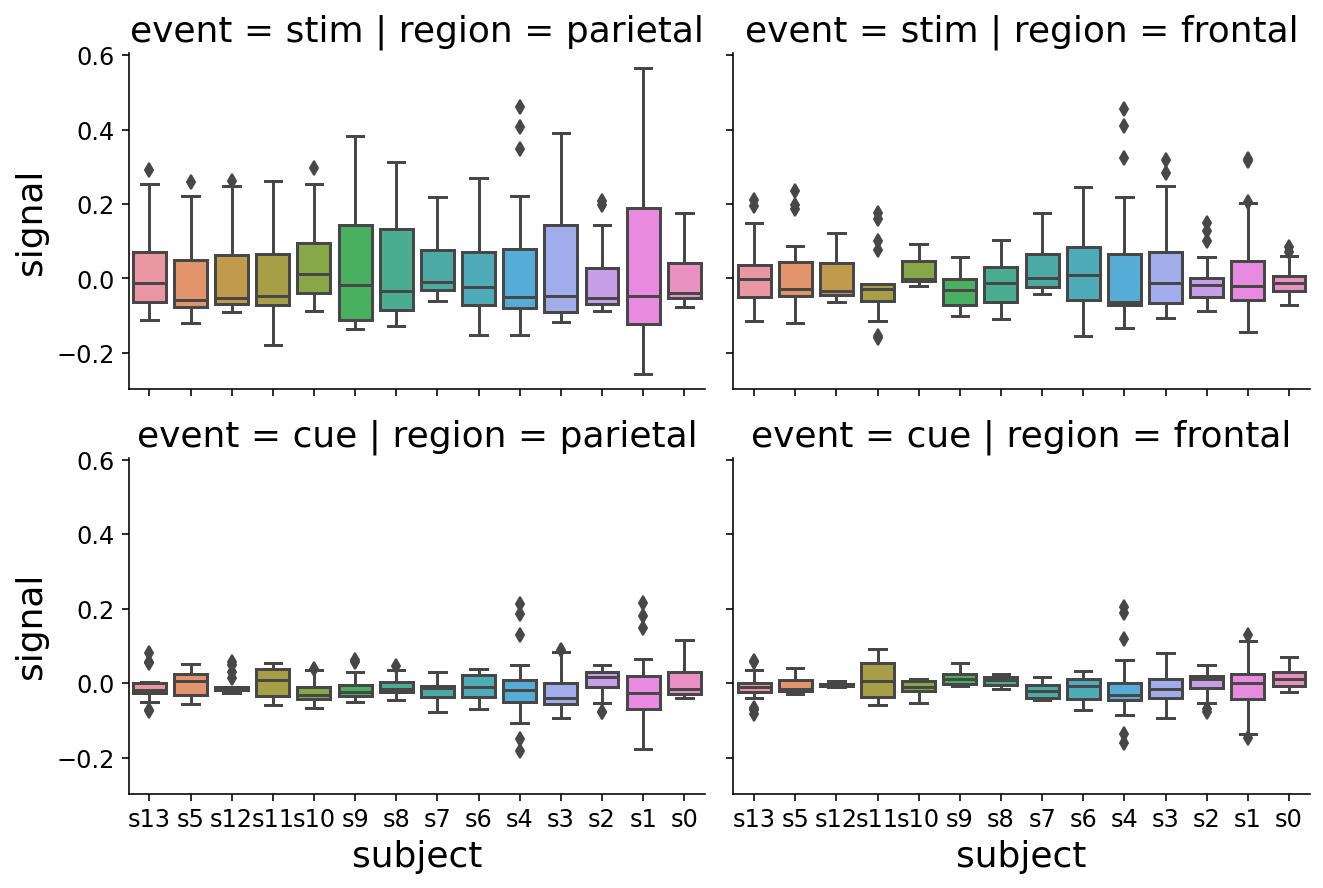

In [54]:
sns.catplot(x="subject", y="signal", kind="box", data=fmri, \
           row="event", col="region", height=3, aspect=1.5);

# Histogram

Seaborn can make histograms, but I tend to stick to matplotlib for those.

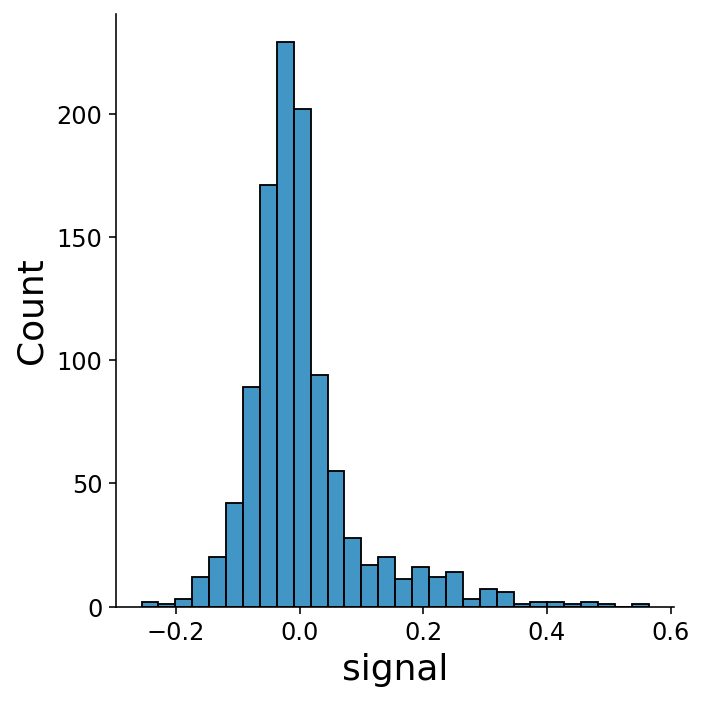

In [55]:
sns.displot(fmri["signal"], bins=30);

# 2D distributions

In [58]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
features = "age sex bmi bp tc ldl hdl tch ltg glu".split()
df = pd.DataFrame(diabetes.data, columns=features)
df.head()

age       sex       bmi        bp        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

# 2D histogram

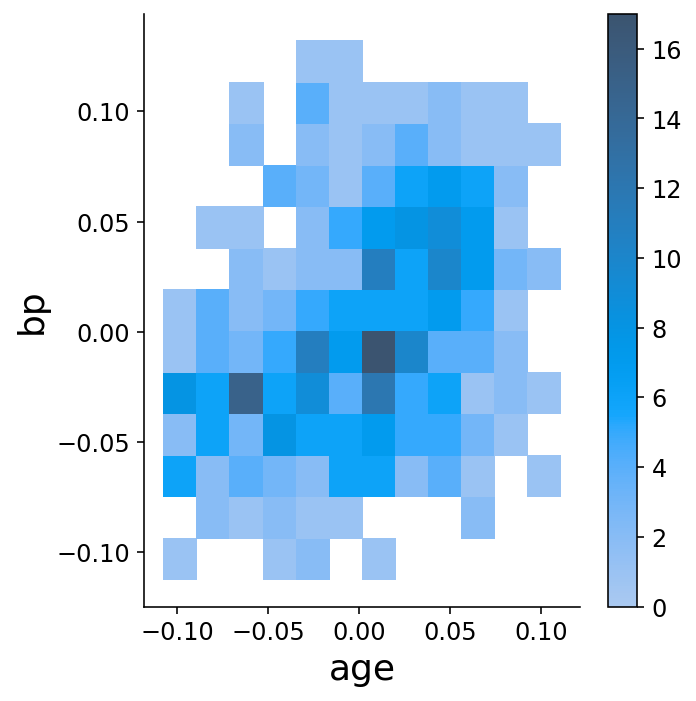

In [128]:
sns.displot(x="age", y="bp", cbar=True, data=df);

# 2D contour plot

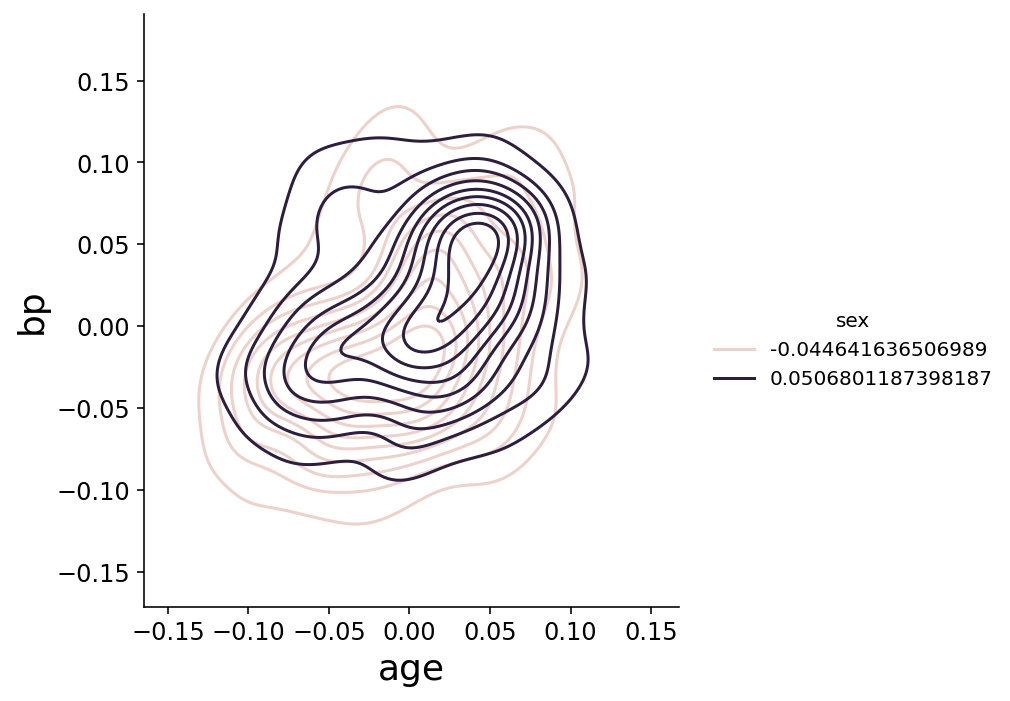

In [130]:
sns.displot(x="age", y="bp", hue="sex", kind="kde", data=df);

# 2D joint plot

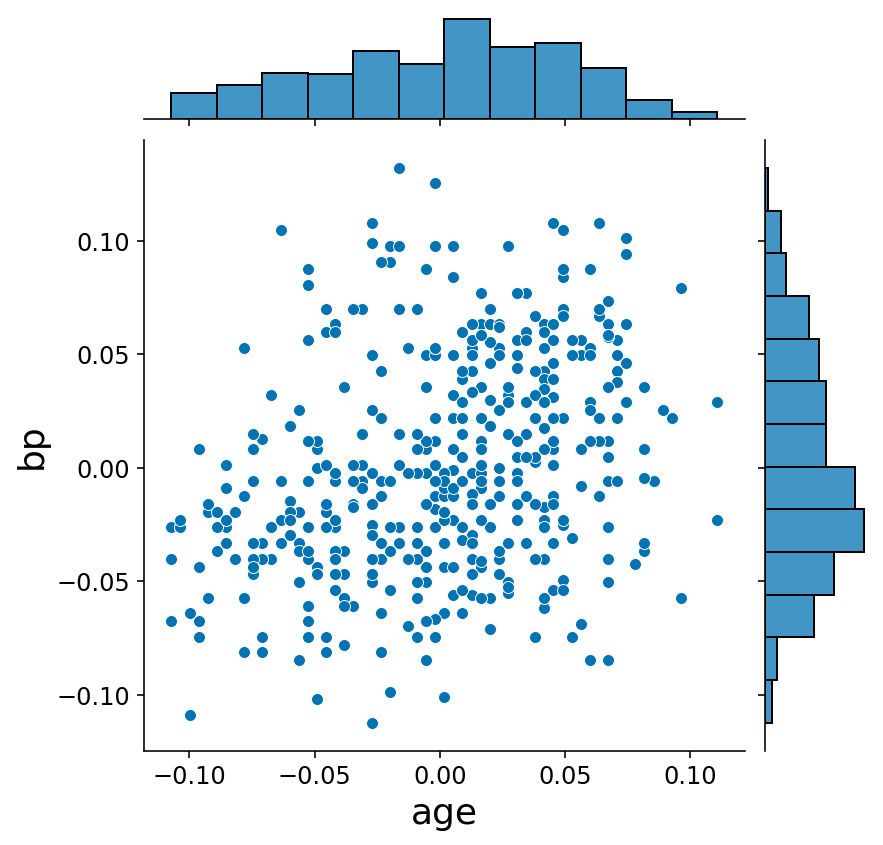

In [59]:
sns.jointplot(x="age", y="bp", data=df);

# 2D joint plot

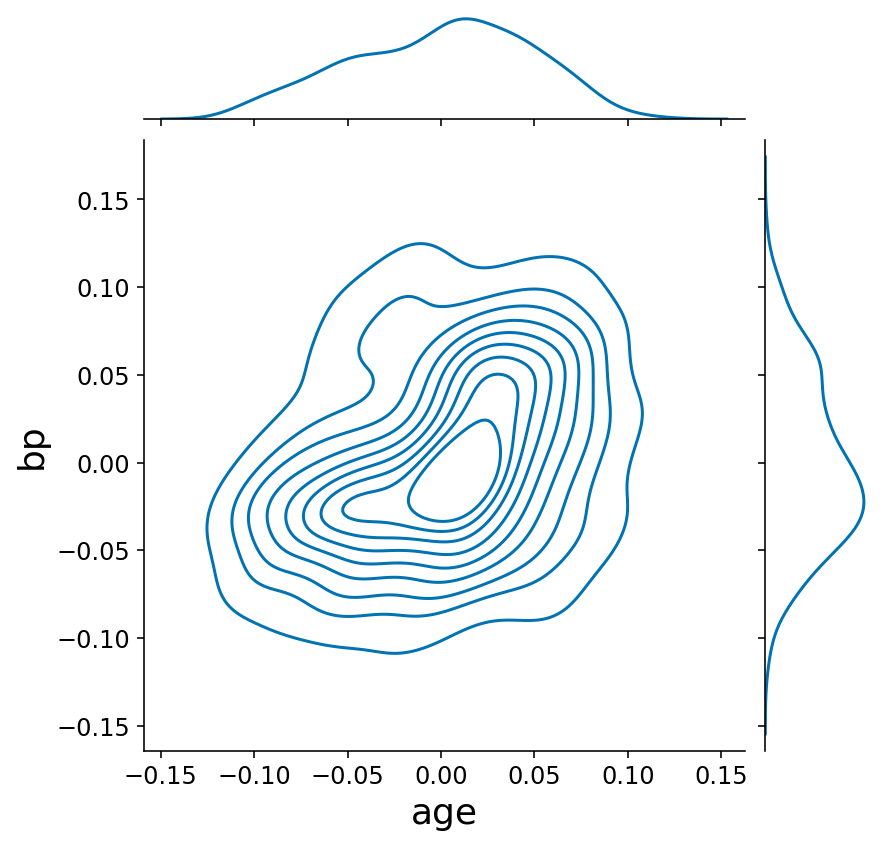

In [60]:
sns.jointplot(x="age", y="bp", data=df, kind="kde");

# Pair plot

### Visualization of multivariate data in n-dimensions

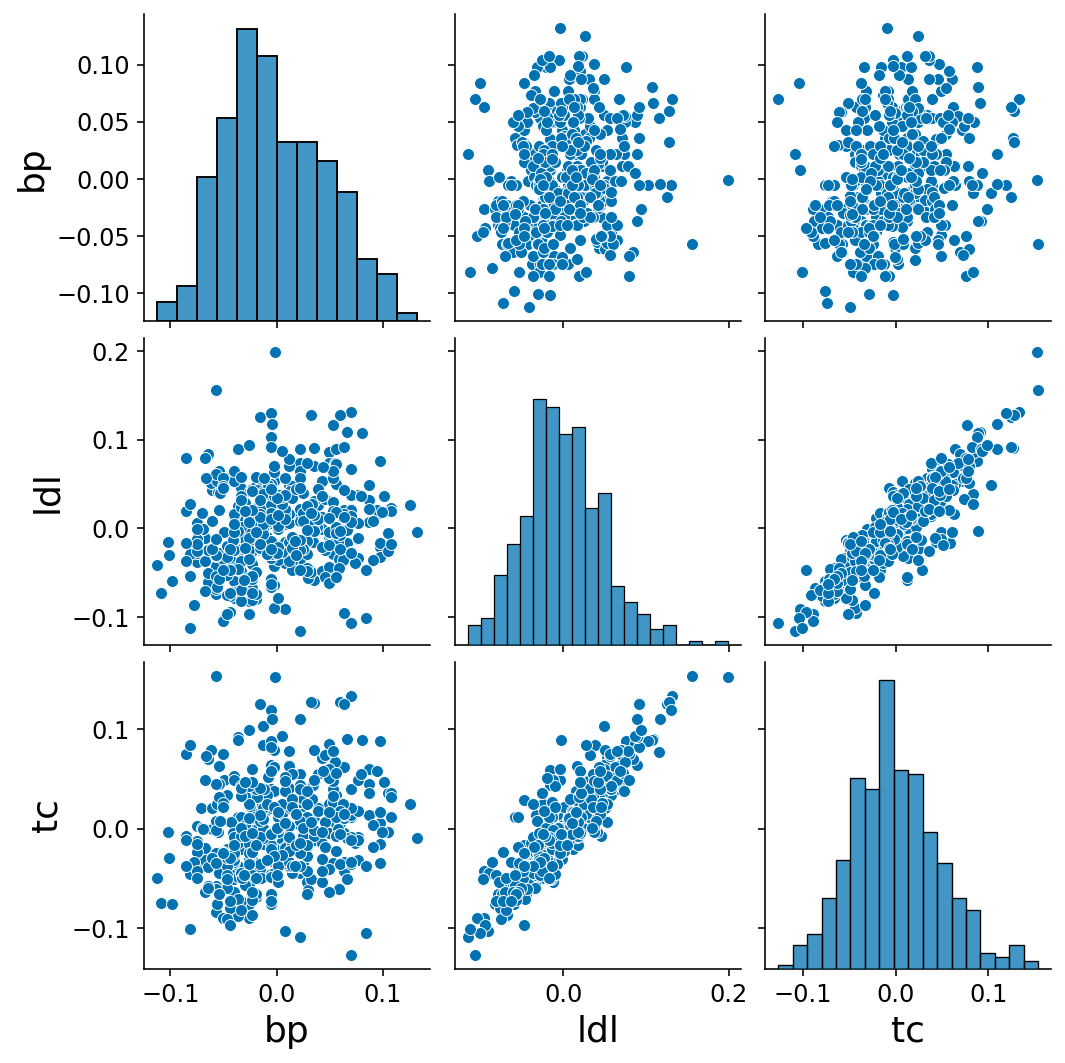

In [61]:
sns.pairplot(df[['bp', 'ldl', 'tc']]);

# Learning Goals

* You will be able to visualize data with basic plots using Matplotlib and Seaborn.
    * 1D distributions
    * 2D relational data
    * 3D relational data
    * Categorical data
* You will appreciate that how you choose to show data can have a large impact on how it is interpreted.

### I do NOT expect you to memorize all of these methods. I expect that you will gain a sense of what you can do with Matplotlib and Seaborn, and that you will be able to look up the the proper functions for how you want to show your data. You can treat this lesson as a reference to look back on.